# Movie Genre Classification Project

## Introduction

Classifying a movie plot into genres was chosen as it provides a wide range of exploratory paths with data science methods and its application can be found in various sophisticated recommendation engines. The project aims at exploring various classifier algorithms, understanding their behaviors and enhancing the classifier accuracy to predict the genre. 

Our goal with the project is to:

1. Conduct EDA on the Data
2. Learn and Apply NLP on the plot content
3. Test out various classic and deep machine learning models
4. Build a pipeline for the best result and pickle the models
5. Develop a simple to use web application as an API for new classification



## Table of Contents

<ol>
	<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Movie-Genre-Classification-Project">Movie Genre Classification Project</a>

	<ol>
		<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Introduction">Introduction</a></li>
		<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Data-Source">Data Source</a>
		<ol>
			<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Context">Context</a></li>
			<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Content">Content</a></li>
		</ol>
		</li>
		<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Exploratory-Data-Analysis">Exploratory Data Analysis</a>
		<ol>
			<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Installing-Libraries">Installing Libraries</a></li>
			<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Importing-Libraries">Importing Libraries</a></li>
			<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Importing-Data">Importing Data</a></li>
			<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Profiling-the-data">Profiling the data</a></li>
			<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Data-Correction">Data Correction</a>
			<ol>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Harmonization-of-Genre-Column">Harmonization of Genre Column</a></li>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Counting-resulting-number-of-Genre">Counting resulting number of Genre</a></li>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Splitting-multi-genre-to-an-array">Splitting multi genre to an array</a></li>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Final-count-of-available-genre">Final count of available genre</a></li>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Total-number-of-available-genre">Total number of available genre</a></li>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Selection-of-top-Genre">Selection of top Genre</a></li>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Genre-who-belong-to-the-top-95%-cummulative-frequency">Genre who belong to the top 95% cummulative frequency</a></li>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Obseving-the-number-of-Genre-per-movie">Obseving the number of Genre per movie</a></li>
			</ol>
			</li>
		</ol>
		</li>
		<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Natural-Language-Processing-on-Plot-Column">Natural Language Processing on Plot Column</a>
		<ol>
			<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Text-blob-Processing-steps">Text blob Processing steps</a>
			<ol>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Converting-to-lower-case">Converting to lower case</a></li>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Removing-Stop-words">Removing Stop words</a></li>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Cleaning-Text">Cleaning Text</a></li>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#4.-Lemmatizing">4. Lemmatizing</a></li>
			</ol>
			</li>
		</ol>
		</li>
		<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Building-the-classic-classification-algorithms">Building the classic classification algorithms</a>
		<ol>
			<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Creating-a-multi-label-Binarizer-for-the-models">Creating a multi label Binarizer for the models</a>
			<ol>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Pickling-the-multi-label-binarizer-variable">Pickling the multi label binarizer variable</a></li>
			</ol>
			</li>
			<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Creating-TFIDF-Vectorizer">Creating TFIDF Vectorizer</a>
			<ol>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Pickling-the-TDIF-Vectorizer">Pickling the TDIF Vectorizer</a></li>
			</ol>
			</li>
			<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Metric-Functions">Metric Functions</a>
			<ol>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Plot-metics">Plot metics</a></li>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Metric-Dataframe">Metric Dataframe</a></li>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Plot-ROC-Curve">Plot ROC Curve</a></li>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Show-metrics-function">Show metrics function</a></li>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Grid-Search-Function">Grid Search Function</a></li>
			</ol>
			</li>
		</ol>
		</li>
		<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Classic-ML-Models">Classic ML Models</a>
		<ol>
			<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Logistic-Regression">Logistic Regression</a>
			<ol>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Grid-Search">Grid Search</a></li>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Best-Parameters">Best Parameters</a></li>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Plot-Metrics">Plot Metrics</a></li>
			</ol>
			</li>
			<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#MultinomialNB-Classifier">MultinomialNB Classifier</a>
			<ol>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Grid-Search---Hyperparameter-Tuning">Grid Search - Hyperparameter Tuning</a></li>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Best-Parameters">Best Parameters</a></li>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Plot-Metrics">Plot Metrics</a></li>
			</ol>
			</li>
			<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Linear-SVC">Linear SVC</a>
			<ol>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Grid-Search---Hyperparameter-Tuning">Grid Search - Hyperparameter Tuning</a></li>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Best-Parameters">Best Parameters</a></li>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Ploting-Metrics">Ploting Metrics</a></li>
			</ol>
			</li>
			<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Decision-Tree">Decision Tree</a>
			<ol>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Grid-Search---Hyperparameter-Tuning">Grid Search - Hyperparameter Tuning</a></li>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Best-Paramters">Best Paramters</a></li>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Plot-Metrics">Plot Metrics</a></li>
			</ol>
			</li>
			<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Random-Forest">Random Forest</a>
			<ol>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Grid-Search---Hyperparameter-Tuning">Grid Search - Hyperparameter Tuning</a></li>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Best-Parameters">Best Parameters</a></li>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Plot-Metrics">Plot Metrics</a></li>
			</ol>
			</li>
			<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Comparison-of-Classic-ML-models">Comparison of Classic ML models</a></li>
		</ol>
		</li>
	</ol>
	</li>
	<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Neural-Networks-ML-Classifiers">Neural Networks ML Classifiers</a>
	<ol>
		<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Keras-Embedding-and-Word2Vec">Keras Embedding and Word2Vec</a>
		<ol>
			<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Word-Embedding">Word Embedding</a></li>
			<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Keras-Embedding-Layer">Keras Embedding Layer</a></li>
			<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Helper-Functions">Helper Functions</a></li>
			<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#One-Hot-Method">One Hot Method</a>
			<ol>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Plot-Metrics">Plot Metrics</a></li>
			</ol>
			</li>
			<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#TDIF-Method">TDIF Method</a>
			<ol>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Ploting-Metrics">Ploting Metrics</a></li>
			</ol>
			</li>
			<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Extended-Learning-Method">Extended Learning Method</a>
			<ol>
				<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Ploting-Metrics">Ploting Metrics</a></li>
			</ol>
			</li>
			<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Comparing-Accuracies-of-Nueral-network-Methods">Comparing Accuracies of Nueral network Methods</a></li>
		</ol>
		</li>
	</ol>
	</li>
	<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Results">Results</a>
	<ol>
		<li><a href="http://localhost:8888/notebooks/Desktop/Data%20Science%20Engineering%20Methods/Project/Movie%20Classification%20EDA.ipynb#Conclusion">Conclusion</a><br />
		&nbsp;</li>
	</ol>
	</li>
</ol>


## Data Source 

https://www.kaggle.com/jrobischon/wikipedia-movie-plots

<h3>Context</h3>

<p>Plot summary descriptions scraped from Wikipedia</p>

<h3>Content</h3>

<p>The dataset contains descriptions of 34,886 movies from around the world. Column descriptions are listed below:</p>

<ul>
	<li><em>Release Year</em>&nbsp;- Year in which the movie was released</li>
	<li><em>Title</em>&nbsp;- Movie title</li>
	<li><em>Origin/Ethnicity</em>&nbsp;- Origin of movie (i.e. American, Bollywood, Tamil, etc.)</li>
	<li><em>Director</em>&nbsp;- Director(s)</li>
	<li><em>Plot</em>&nbsp;- Main actor and actresses</li>
	<li><em>Genre</em>&nbsp;- Movie Genre(s)</li>
	<li><em>Wiki Page</em>&nbsp;- URL of the Wikipedia page from which the plot description was scraped</li>
	<li><em>Plot</em>&nbsp;- Long form description of movie plot (WARNING: May contain spoilers!!!)<br />
	&nbsp;</li>
</ul>


## Exploratory Data Analysis

In this section we will try to conduct data exploration for learn about the feature that the data set has to offer.

### Installing Libraries

In [1]:
#!pip install textblob
#!pip install scikit-plot
#!pip install pandas-profiling
#!pip install nltk

### Importing Libraries

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pandas_profiling

import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn import metrics

import pickle

### Importing Data

In [3]:
df = pd.read_csv('data/wiki_movie_plots_deduped.csv')
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [4]:
df.shape

(34886, 8)

In [5]:
df.describe()

,Release Year
count,34886.000000
mean,1981.314252
std,27.815174
min,1901.000000
25%,1957.000000
50%,1988.000000
75%,2007.000000
max,2017.000000


### Profiling the data

In [6]:
pandas_profiling.ProfileReport(df)

In [7]:
print(df['Genre'].count())

34886


### Data Correction

#### Harmonization of Genre Column

From the above profiling we have seen that the column in genre is highly irregular, there are spelling fix and genre correction which needs to be done

In [8]:
movies = df

In [9]:
movies['GenreCorrected'] =movies['Genre'] 
movies['GenreCorrected']=movies['GenreCorrected'].str.strip()
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' - ', '|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' / ', '|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('/', '|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' & ', '|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(', ', '|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('; ', '|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('bio-pic', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biopic', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biographical', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biodrama', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('bio-drama', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biographic', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(film genre\)', '')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('animated','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('anime','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('children\'s','children')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedey','comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\[not in citation given\]','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' set 4,000 years ago in the canadian arctic','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('historical','history')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romantic','romance')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('3-d','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('3d','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('viacom 18 motion pictures','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('sci-fi','science_fiction')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('ttriller','thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('.','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('based on radio serial','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' on the early years of hitler','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('sci fi','science_fiction')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('science fiction','science_fiction')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' (30min)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('16 mm film','short')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\[140\]','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\[144\]','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' for ','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('adventures','adventure')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('kung fu','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('kung-fu','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('martial arts','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('world war ii','war')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('world war i','war')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biography about montreal canadiens star|maurice richard','biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('bholenath movies|cinekorn entertainment','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(volleyball\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('spy film','spy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('anthology film','anthology')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biography fim','biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('avant-garde','avant_garde')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biker film','biker')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('buddy cop','buddy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('buddy film','buddy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedy 2-reeler','comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('films','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('film','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biography of pioneering american photographer eadweard muybridge','biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('british-german co-production','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('bruceploitation','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedy-drama adaptation of the mordecai richler novel','comedy-drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('movies by the mob\|knkspl','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('movies','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('movie','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('coming of age','coming_of_age')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('coming-of-age','coming_of_age')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('drama about child soldiers','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('(( based).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('(( co-produced).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('(( adapted).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('(( about).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('musical b','musical')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('animationchildren','animation|children')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' period','period')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('drama loosely','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(aquatics|swimming\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(aquatics|swimming\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace("yogesh dattatraya gosavi's directorial debut \[9\]",'')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace("war-time","war")
movies['GenreCorrected']=movies['GenreCorrected'].str.replace("wartime","war")
movies['GenreCorrected']=movies['GenreCorrected'].str.replace("ww1","war")
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('unknown','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace("wwii","war")
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('psychological','psycho')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('rom-coms','romance')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('true crime','crime')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|007','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('slice of life','slice_of_life')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('computer animation','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('gun fu','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('j-horror','horror')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(shogi|chess\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('afghan war drama','war drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|6 separate stories','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(30min\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' (road bicycle racing)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' v-cinema','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('tv miniseries','tv_miniseries')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|docudrama','\|documentary|drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' in animation','|animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('((adaptation).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('((adaptated).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('((adapted).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('(( on ).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('american football','sports')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dev\|nusrat jahan','sports')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('television miniseries','tv_miniseries')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(artistic\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \|direct-to-dvd','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('history dram','history drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('martial art','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('psycho thriller,','psycho thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|1 girl\|3 suitors','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(road bicycle racing\)','')
filterE = movies['GenreCorrected']=="ero"
movies.loc[filterE,'GenreCorrected']="adult"
filterE = movies['GenreCorrected']=="music"
movies.loc[filterE,'GenreCorrected']="musical"
filterE = movies['GenreCorrected']=="-"
movies.loc[filterE,'GenreCorrected']=''
filterE = movies['GenreCorrected']=="comedy–drama"
movies.loc[filterE,'GenreCorrected'] = "comedy|drama"
filterE = movies['GenreCorrected']=="comedy–horror"
movies.loc[filterE,'GenreCorrected'] = "comedy|horror"
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' ','|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(',','|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('-','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actionadventure','action|adventure')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actioncomedy','action|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actiondrama','action|drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actionlove','action|love')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actionmasala','action|masala')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actionchildren','action|children')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('fantasychildren\|','fantasy|children')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('fantasycomedy','fantasy|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('fantasyperiod','fantasy|period')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('cbctv_miniseries','tv_miniseries')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramacomedy','drama|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramacomedysocial','drama|comedy|social')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramathriller','drama|thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedydrama','comedy|drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramathriller','drama|thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedyhorror','comedy|horror')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('sciencefiction','science_fiction')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('adventurecomedy','adventure|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('animationdrama','animation|drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|\|','|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('muslim','religious')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('thriler','thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('crimethriller','crime|thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('fantay','fantasy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actionthriller','action|thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedysocial','comedy|social')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('martialarts','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|\(children\|poker\|karuta\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('epichistory','epic|history')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('erotica','adult')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('erotic','adult')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('((\|produced\|).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('chanbara','chambara')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedythriller','comedy|thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biblical','religious')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biblical','religious')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('colour\|yellow\|productions\|eros\|international','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|directtodvd','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('liveaction','live|action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('melodrama','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('superheroes','superheroe')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('gangsterthriller','gangster|thriller')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('heistcomedy','comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('heist','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('historic','history')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('historydisaster','history|disaster')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('warcomedy','war|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('westerncomedy','western|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('ancientcostume','costume')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('computeranimation','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramatic','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('familya','family')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('familya','family')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramedy','drama|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramaa','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('famil\|','family')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('superheroe','superhero')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biogtaphy','biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('devotionalbiography','devotional|biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('docufiction','documentary|fiction')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('familydrama','family|drama')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('espionage','spy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('supeheroes','superhero')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romancefiction','romance|fiction')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('horrorthriller','horror|thriller')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('suspensethriller','suspense|thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('musicaliography','musical|biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('triller','thriller')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|\(fiction\)','|fiction')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romanceaction','romance|action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romancecomedy','romance|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romancehorror','romance|horror')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romcom','romance|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('rom\|com','romance|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('satirical','satire')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('science_fictionchildren','science_fiction|children')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('homosexual','adult')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('sexual','adult')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('mockumentary','documentary')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('periodic','period')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romanctic','romantic')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('politics','political')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('samurai','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('tv_miniseries','series')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('serial','series')

filterE = movies['GenreCorrected']=="musical–comedy"
movies.loc[filterE,'GenreCorrected'] = "musical|comedy"

filterE = movies['GenreCorrected']=="roman|porno"
movies.loc[filterE,'GenreCorrected'] = "adult"


filterE = movies['GenreCorrected']=="action—masala"
movies.loc[filterE,'GenreCorrected'] = "action|masala"


filterE = movies['GenreCorrected']=="horror–thriller"
movies.loc[filterE,'GenreCorrected'] = "horror|thriller"

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('family','children')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('martial_arts','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('horror','thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('war','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('adventure','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('science_fiction','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('western','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('western','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('noir','black')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('spy','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('superhero','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('social','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('suspense','action')


filterE = movies['GenreCorrected']=="drama|romance|adult|children"
movies.loc[filterE,'GenreCorrected'] = "drama|romance|adult"

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|–\|','|')
movies['GenreCorrected']=movies['GenreCorrected'].str.strip(to_strip='\|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actionner','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.strip()

#### Counting resulting number of Genre

In [10]:
movies['Count']=1
movies[['GenreCorrected','Count']].groupby(['GenreCorrected'],as_index=False).count().sort_values(['Count'], ascending=False).head(10)

,GenreCorrected,Count
0,,6206
516,drama,6107
359,comedy,4411
2,action,3790
1111,thriller,2163
964,romance,954
203,animation,601
973,romance|comedy,577
447,crime,573
387,comedy|drama,560


#### Splitting multi genre to an array

In [11]:
movies['GenreSplit']=movies['GenreCorrected'].str.split('|')
movies['GenreSplit']= movies['GenreSplit'].apply(np.sort).apply(np.unique)

In [12]:
genres_array = np.array([])

for i in range(0,movies.shape[0]-1):
    genres_array = np.concatenate((genres_array, movies['GenreSplit'][i] ))
    
genres_array

array(['', '', '', ..., 'comedy', 'comedy', 'romance'], dtype='<U32')

In [13]:
genres = pd.DataFrame({'Genre':genres_array})

#### Final count of available genre

In [14]:
genres['Count']=1
genres[['Genre','Count']].groupby(['Genre'], as_index=False).sum().sort_values(['Count'], ascending=False).head(10)

,Genre,Count
116,drama,9487
85,comedy,7320
0,,6222
4,action,5952
426,thriller,3291
337,romance,2639
94,crime,1607
244,musical,951
16,animation,914
73,children,684


In [15]:
genres=genres[['Genre','Count']].groupby(['Genre'], as_index=False).sum().sort_values(['Count'], ascending=False)

In [16]:
genres = genres[genres['Genre']!='']
genres.head(25)

,Genre,Count
116,drama,9487
85,comedy,7320
4,action,5952
426,thriller,3291
337,romance,2639
94,crime,1607
244,musical,951
16,animation,914
73,children,684
131,fantasy,542


#### Total number of available genre

In [17]:
TotalCountGenres=sum(genres['Count'])
TotalCountGenres

37321

#### Selection of top Genre

We will be selecting the top genre from the list of oberserved genre whose cummulative frequency is above 95%

In [18]:
genres['Frequency'] = genres['Count']/TotalCountGenres

In [19]:
genres['CumulativeFrequency'] = genres['Frequency'].cumsum()

In [20]:
genres.head(20)

,Genre,Count,Frequency,CumulativeFrequency
116,drama,9487,0.254200,0.254200
85,comedy,7320,0.196136,0.450336
4,action,5952,0.159481,0.609818
426,thriller,3291,0.088181,0.697998
337,romance,2639,0.070711,0.768709
94,crime,1607,0.043059,0.811768
244,musical,951,0.025482,0.837250
16,animation,914,0.024490,0.861740
73,children,684,0.018327,0.880068
131,fantasy,542,0.014523,0.894590


Selecting CF <=.957

#### Genre who belong to the top 95% cummulative frequency

In [21]:
np.array(genres[genres['CumulativeFrequency']<=.957]['Genre'])

array(['drama', 'comedy', 'action', 'thriller', 'romance', 'crime',
       'musical', 'animation', 'children', 'fantasy', 'mystery',
       'biography', 'black', 'history', 'short', 'documentary', 'sports',
       'series', 'adult', 'political'], dtype=object)

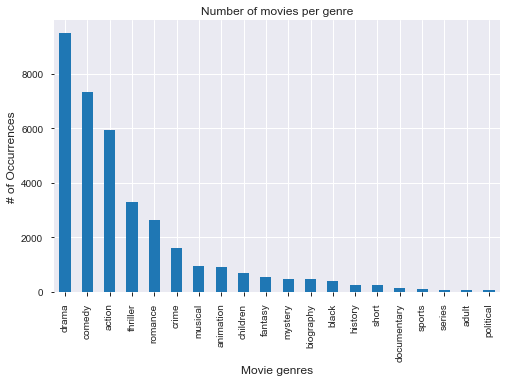

In [22]:
genres[genres['CumulativeFrequency']<=.957][['Genre','Count']].plot(x='Genre', y='Count', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of movies per genre")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Movie genres', fontsize=12)
plt.show()

In [23]:
mainGenres=np.array(genres[genres['CumulativeFrequency']<=.957]['Genre'])

In [24]:
arr1=np.array(['adult', 'romance', 'drama','and'])
arr1[np.in1d(arr1,mainGenres)] # genres not in the mainGenres array will be deleted

array(['adult', 'romance', 'drama'], dtype='<U7')

In [25]:
movies['GenreSplit'][10:12].apply(lambda x: x[np.in1d(x,mainGenres)])

10                   [short]
11    [action, crime, short]
Name: GenreSplit, dtype: object

In [26]:
movies['GenreSplitMain'] = movies['GenreSplit'].apply(lambda x: x[np.in1d(x,mainGenres)])

In [27]:
movies[['GenreSplitMain','GenreSplit','Genre']][200:220]

,GenreSplitMain,GenreSplit,Genre
200,[drama],[drama],drama
201,[drama],[drama],drama
202,[comedy],[comedy],comedy
203,[drama],[drama],drama
204,[comedy],[comedy],comedy
205,"[comedy, drama]","[comedy, drama]",comedy drama
206,[mystery],[mystery],mystery
207,[drama],[drama],drama
208,[drama],[drama],drama
209,"[comedy, drama]","[comedy, drama]",comedy drama


#### Obseving the number of Genre per movie

In [28]:
movies['MainGenresCount'] = movies['GenreSplitMain'].apply(len)
max(movies['MainGenresCount'] )

7

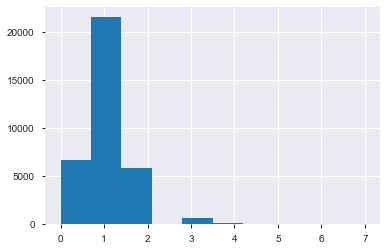

In [29]:
movies['MainGenresCount'].hist()

In [30]:
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)

In [31]:
movies.GenreSplitMain[6:15].apply(lambda x: '-'.join(x)).str.split(pat='-',n=5,expand=True)

,0,1,2
6,action,None,None
7,comedy,None,None
8,,None,None
9,,None,None
10,short,None,None
11,action,crime,short
12,short,None,None
13,biography,None,None
14,comedy,None,None


In [32]:
movies.GenreSplitMain[6:15].apply(lambda x: '-'.join(x)).str.get_dummies(sep='-')

,action,biography,comedy,crime,short
6,1,0,0,0,0
7,0,0,1,0,0
8,0,0,0,0,0
9,0,0,0,0,0
10,0,0,0,0,1
11,1,0,0,1,1
12,0,0,0,0,1
13,0,1,0,0,0
14,0,0,1,0,0


In [33]:
movies.GenreSplitMain[6:15]

6                   [action]
7                   [comedy]
8                         []
9                         []
10                   [short]
11    [action, crime, short]
12                   [short]
13               [biography]
14                  [comedy]
Name: GenreSplitMain, dtype: object

In [34]:
movies.columns

Index(['Release_Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre', 'Wiki_Page', 'Plot', 'GenreCorrected', 'Count', 'GenreSplit',
       'GenreSplitMain', 'MainGenresCount'],
      dtype='object')

In [35]:
movies.shape

(34886, 13)

In [36]:
# the title is not unique
len(movies.Title.unique())

32432

In [37]:
# The number of movies not having a genre
movies[movies.GenreCorrected==''].shape

(6206, 13)

## Natural Language Processing on Plot Column

Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.

### Text blob Processing steps

#### Converting to lower case

In [38]:
movies['Plot'].apply(lambda x : str.lower(x))[:5]

0    a bartender is working at a saloon, serving dr...
1    the moon, painted with a smiling face hangs ov...
2    the film, just over a minute long, is composed...
3    lasting just 61 seconds and consisting of two ...
4    the earliest known adaptation of the classic f...
Name: Plot, dtype: object

In [39]:
movies['Plot_correction'] = movies['Plot'].apply(lambda x : str.lower(x))

#### Removing Stop words

In [40]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
import nltk

In [41]:
dir(nltk)[:10]

['AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger']

In [42]:
stopwords = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

#### Cleaning Text

Writing a function which can clean text for all the plots in the dataframe

In [43]:
def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

In [44]:
movies['Plot_correction'] = movies['Plot_correction'].apply(lambda x: clean_text(x))

In [45]:
movies['Plot_correction']

0        [bartender, working, saloon, serving, drinks, ...
1        [moon, painted, smiling, face, hangs, park, ni...
2        [film, minute, long, composed, two, shots, fir...
3        [lasting, 61, seconds, consisting, two, shots,...
4        [earliest, known, adaptation, classic, fairyta...
                               ...                        
34881    [film, begins, 1919, world, war, ended, centre...
34882    [two, musicians, salih, gürkan, described, adv...
34883    [zafer, sailor, living, mother, döndü, coastal...
34884    [film, centres, around, young, woman, named, a...
34885    [writer, orhan, şahin, returns, stanbul, many,...
Name: Plot_correction, Length: 34886, dtype: object

#### 4. Lemmatizing

After conducting research we found and tried out both stemming and lemmatizing techniques. We finally decided to use lemmatizing for the final plot wors correction as it gives better results

In [46]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

In [47]:
movies['Plot_correction'] = movies['Plot_correction'].apply(lambda x: lemmatizing(x))

In [48]:
movies['Plot_correction'] =  movies['Plot_correction'].apply(lambda x: " ".join(str(k) for k in x))

In [49]:
movies['Plot_correction']

0        bartender working saloon serving drink custome...
1        moon painted smiling face hang park night youn...
2        film minute long composed two shot first girl ...
3        lasting 61 second consisting two shot first sh...
4        earliest known adaptation classic fairytale fi...
                               ...                        
34881    film begin 1919 world war ended centre around ...
34882    two musician salih gürkan described adventure ...
34883    zafer sailor living mother döndü coastal villa...
34884    film centre around young woman named amy tyler...
34885    writer orhan şahin return stanbul many year he...
Name: Plot_correction, Length: 34886, dtype: object

## Building the classic classification algorithms

Steps to be done:

- Building the classes: one dummy variable for each genre. In this final project, there are 20 genres of movies.
- Split the data in Train and Test
- Building the features based on TfidfVectorize

In [50]:
movies['GenreSplit']

0                       []
1                       []
2                       []
3                       []
4                       []
               ...        
34881                   []
34882             [comedy]
34883             [comedy]
34884    [comedy, romance]
34885            [romance]
Name: GenreSplit, Length: 34886, dtype: object

In [51]:
mainGenres

array(['drama', 'comedy', 'action', 'thriller', 'romance', 'crime',
       'musical', 'animation', 'children', 'fantasy', 'mystery',
       'biography', 'black', 'history', 'short', 'documentary', 'sports',
       'series', 'adult', 'political'], dtype=object)

In [52]:
movies['GenreSplit'] = movies['GenreSplit'].apply(lambda x: x if x in mainGenres else None)

C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


In [53]:
movies['GenreSplit'] 

0             None
1             None
2             None
3             None
4             None
           ...    
34881         None
34882     [comedy]
34883     [comedy]
34884         None
34885    [romance]
Name: GenreSplit, Length: 34886, dtype: object

In [54]:
movies.dropna(subset=['GenreSplit'], inplace=True)

In [55]:
movies['GenreSplit']

6           [action]
7           [comedy]
10           [short]
12           [short]
13       [biography]
            ...     
34876        [drama]
34877        [drama]
34882       [comedy]
34883       [comedy]
34885      [romance]
Name: GenreSplit, Length: 21009, dtype: object

### Creating a multi label Binarizer for the models

In [56]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(movies['GenreSplit'])

# transform target variable
y = multilabel_binarizer.transform(movies['GenreSplit'])

In [57]:
multilabel_binarizer.classes_

array(['action', 'adult', 'animation', 'biography', 'black', 'children',
       'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'history',
       'musical', 'mystery', 'political', 'romance', 'series', 'short',
       'sports', 'thriller'], dtype=object)

#### Pickling the multi label binarizer variable

In [58]:
pickle.dump(multilabel_binarizer, open('helper/multilabel_binarizer.pkl', 'wb'))

### Creating TFIDF Vectorizer

In [59]:
tfidf_vectorizer = TfidfVectorizer(stop_words ='english', smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')

In [60]:
xtrain, xval, ytrain, yval = train_test_split(movies['Plot_correction'], y, test_size=0.2, random_state=9)

In [61]:
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

#### Pickling the TDIF Vectorizer

In [62]:
pickle.dump(tfidf_vectorizer, open('helper/tfidf_vectorizer.pkl', 'wb'))

### Metric Functions

Writing helper functions to plot and view metrics for each genre

#### Plot metics

This function will plot a heat map of accuracy_score, precision, recall, fscore and roc_auc for a given classifier

In [63]:
def plot_metrics(title, clf, yval, y_pred, xval_tfidf):
    df = {}
    for i,k in enumerate(multilabel_binarizer.classes_):
        yval_item = [item[i] for item in yval]
        y_pred_item = [item[i] for item in y_pred]
        met = metrics.precision_recall_fscore_support(yval_item, y_pred_item, average="micro")
        df[k]={}
        df[k]['accuracy_score'] = metrics.accuracy_score(yval_item, y_pred_item)
        df[k]['precision'] = met[0]
        df[k]['recall'] = met[1]
        df[k]['fscore'] = met[2]
        try:
            y_pred_dec = clf.decision_function(xval_tfidf)
            decision_val = [item[i] for item in y_pred_dec]
            df[k]['roc_auc'] = metrics.roc_auc_score(yval_item,decision_val,average="micro")
        except:
            try:
                y_pred_dec = clf.predict_proba(xval_tfidf)
                decision_val = [item[i] for item in y_pred_dec]
                df[k]['roc_auc'] = metrics.roc_auc_score(yval_item,decision_val,average="micro")
            except:
                try:
                    y_pred_dec = clf.predict_proba(xval_tfidf)
                    decision_val = [item[1] for item in y_pred_dec[i]]
                    df[k]['roc_auc'] = metrics.roc_auc_score(yval_item,decision_val,average="micro")
                except:
                    df[k]['roc_auc'] = None
    df2 = pd.DataFrame.from_dict(df, orient='index')
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(df2, annot=True,  cmap="YlGnBu", ax = ax)
    ax.set_title(title)
    plt.show()

#### Metric Dataframe

This funcion will return accuracy_score, precision, recall, fscore and roc_auc for a given classifier as a dataframe

In [64]:
def metrics_df(title,clf,  yval, y_pred, xval_tfidf):
    df = {}
    for i,k in enumerate(multilabel_binarizer.classes_):
        yval_item = [item[i] for item in yval]
        y_pred_item = [item[i] for item in y_pred]
        met = metrics.precision_recall_fscore_support(yval_item, y_pred_item, average="micro")
        df[k]={}
        df[k]['accuracy_score'] = metrics.accuracy_score(yval_item, y_pred_item)
        df[k]['precision'] = met[0]
        df[k]['recall'] = met[1]
        df[k]['fscore'] = met[2]
        try:
            y_pred_dec = clf.decision_function(xval_tfidf)
            decision_val = [item[i] for item in y_pred_dec]
            df[k]['roc_auc'] = metrics.roc_auc_score(yval_item,decision_val,average="micro")
        except:
            try:
                y_pred_dec = clf.predict_proba(xval_tfidf)
                decision_val = [item[i] for item in y_pred_dec]
                df[k]['roc_auc'] = metrics.roc_auc_score(yval_item,decision_val,average="micro")
            except:
                try:
                    y_pred_dec = clf.predict_proba(xval_tfidf)
                    decision_val = [item[1] for item in y_pred_dec[i]]
                    df[k]['roc_auc'] = metrics.roc_auc_score(yval_item,decision_val,average="micro")
                except:
                    df[k]['roc_auc'] = None
    df2 = pd.DataFrame.from_dict(df, orient='index')
    df2.reset_index(level=0, inplace=True)
    df2.rename(columns={"index": "genre"}, inplace = True)
    df2['classifier'] = title
    return df2

#### Plot ROC Curve

This function plots the ROC curve for each of the genre for a given classifier

In [65]:
def plot_roc_curve(title,clf, yval, y_pred, xval_tfidf):
    for i,k in enumerate(multilabel_binarizer.classes_):
        yval_item = [item[i] for item in yval]
        y_pred_item = [item[i] for item in y_pred]
        met = metrics.precision_recall_fscore_support(yval_item, y_pred_item, average="micro")
        try: 
            y_pred_dec = clf.decision_function(xval_tfidf)
            decision_val = [item[i] for item in y_pred_dec]
            fpr, tpr, thresholds = metrics.roc_curve(yval_item, decision_val)
            auc_value = metrics.auc(fpr, tpr)
            plt.plot(fpr, tpr, label=k + ' - auc (area = %0.2f)' % auc_value)
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.0])
            plt.rcParams['font.size'] = 12
            plt.legend(loc="best",bbox_to_anchor=(1, 1))
            plt.title('ROC curve for '+ title +' classifier')
            plt.xlabel('False Positive Rate (1 - Specificity)')
            plt.ylabel('True Positive Rate (Sensitivity)')
            plt.grid(True)
        except:
            y_pred_dec = clf.predict_proba(xval_tfidf)
            try: 
                decision_val = [item[i] for item in y_pred_dec]
                fpr, tpr, thresholds = metrics.roc_curve(yval_item, decision_val)
                auc_value = metrics.auc(fpr, tpr)
                plt.plot(fpr, tpr, label=k + ' - auc (area = %0.2f)' % auc_value)
                plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
                plt.xlim([0.0, 1.0])
                plt.ylim([0.0, 1.0])
                plt.rcParams['font.size'] = 12
                plt.legend(loc="best",bbox_to_anchor=(1, 1))
                plt.title('ROC curve for '+ title +' classifier')
                plt.xlabel('False Positive Rate (1 - Specificity)')
                plt.ylabel('True Positive Rate (Sensitivity)')
                plt.grid(True)
            except:
                decision_val = [item[1] for item in y_pred_dec[i]]
                fpr, tpr, thresholds = metrics.roc_curve(yval_item, decision_val)
                auc_value = metrics.auc(fpr, tpr)
                plt.plot(fpr, tpr, label=k + ' - auc (area = %0.2f)' % auc_value)
                plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
                plt.xlim([0.0, 1.0])
                plt.ylim([0.0, 1.0])
                plt.rcParams['font.size'] = 12
                plt.legend(loc="best",bbox_to_anchor=(1, 1))
                plt.title('ROC curve for '+ title +' classifier')
                plt.xlabel('False Positive Rate (1 - Specificity)')
                plt.ylabel('True Positive Rate (Sensitivity)')
                plt.grid(True)

#### Show metrics function

A cummulative function which will perform ploting of metrics and roc curves

In [66]:
def show_metrics(title,clf, yval, y_pred, xval_tfidf):
    plot_metrics(title,clf, yval, y_pred, xval_tfidf)
    result_lr_df = metrics_df(title, clf, yval, y_pred, xval_tfidf)
    plot_roc_curve(title,clf, yval, y_pred, xval_tfidf)

#### Grid Search Function

This function will run grid search and return the best classifier parameters, sorted results and predicted y

In [67]:
def grid_search_func(clr, parameters, xtrain_tfidf, ytrain):
    clr_cv=GridSearchCV(clr,param_grid=parameters, error_score=0.0)
    clr_cv.fit(xtrain_tfidf, ytrain)
    results = pd.DataFrame(clr_cv.cv_results_)
    sorted_results = results.sort_values(by=['rank_test_score']).head()
    clf = clr_cv.best_estimator_
    y_pred = clf.predict(xval_tfidf)
    return [clf, sorted_results, y_pred]

## Classic ML Models

### Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score

In [69]:
lr = LogisticRegression()
clf_lr = OneVsRestClassifier(lr, n_jobs=-1)

In [70]:
clf_lr.get_params().keys()

dict_keys(['estimator__C', 'estimator__class_weight', 'estimator__dual', 'estimator__fit_intercept', 'estimator__intercept_scaling', 'estimator__l1_ratio', 'estimator__max_iter', 'estimator__multi_class', 'estimator__n_jobs', 'estimator__penalty', 'estimator__random_state', 'estimator__solver', 'estimator__tol', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs'])

#### Grid Search

In [71]:
parameters = {
   'estimator__penalty': ["l1", "l2"],
    'estimator__C': [0.5, 1., 5.],
    'estimator__dual': [True, False],
    "estimator__n_jobs":[-1],
}

In [72]:
clf_lr, best_params, y_pred_lr = grid_search_func(clf_lr, parameters, xtrain_tfidf, ytrain)

C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\sklearn\model_selection\_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True

  FitFailedWarning)
C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\sklearn\model_selection\_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Valu

#### Best Parameters

In [73]:
best_params

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__C,param_estimator__dual,param_estimator__n_jobs,param_estimator__penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,22.276592,1.663244,0.058187,0.008195,0.5,False,-1,l2,"{'estimator__C': 0.5, 'estimator__dual': False...",0.341424,0.345234,0.346662,0.344440,0.002211,1
1,4.534769,0.583300,0.054872,0.007753,0.5,True,-1,l2,"{'estimator__C': 0.5, 'estimator__dual': True,...",0.341246,0.344877,0.345591,0.343904,0.001903,2
7,23.735789,0.820663,0.061832,0.009246,1,False,-1,l2,"{'estimator__C': 1.0, 'estimator__dual': False...",0.340353,0.344163,0.344698,0.343071,0.001934,3
5,4.871277,1.014071,0.063187,0.016741,1,True,-1,l2,"{'estimator__C': 1.0, 'estimator__dual': True,...",0.339104,0.344698,0.342913,0.342238,0.002333,4
9,4.980119,0.592874,0.070819,0.009399,5,True,-1,l2,"{'estimator__C': 5.0, 'estimator__dual': True,...",0.335535,0.344163,0.341307,0.340334,0.003589,5


In [74]:
result_lr_df = metrics_df("LogisticRegression",clf_lr, yval, y_pred_lr, xval_tfidf)
result_lr_df

,genre,accuracy_score,precision,recall,fscore,roc_auc,classifier
0,action,0.861970,0.861970,0.861970,0.861970,0.850268,LogisticRegression
1,adult,0.998572,0.998572,0.998572,0.998572,0.712504,LogisticRegression
2,animation,0.980961,0.980961,0.980961,0.980961,0.832605,LogisticRegression
3,biography,0.988101,0.988101,0.988101,0.988101,0.635179,LogisticRegression
4,black,0.983579,0.983579,0.983579,0.983579,0.836407,LogisticRegression
5,children,0.986197,0.986197,0.986197,0.986197,0.625269,LogisticRegression
6,comedy,0.827225,0.827225,0.827225,0.827225,0.811100,LogisticRegression
7,crime,0.970490,0.970490,0.970490,0.970490,0.810580,LogisticRegression
8,documentary,0.994288,0.994288,0.994288,0.994288,0.714646,LogisticRegression
9,drama,0.718467,0.718467,0.718467,0.718467,0.729945,LogisticRegression


In [75]:
clf_lr.fit(xtrain_tfidf, ytrain)
pickle.dump(clf_lr, open('model/LogisticRegression_classifier.pkl', 'wb'))

#### Plot Metrics

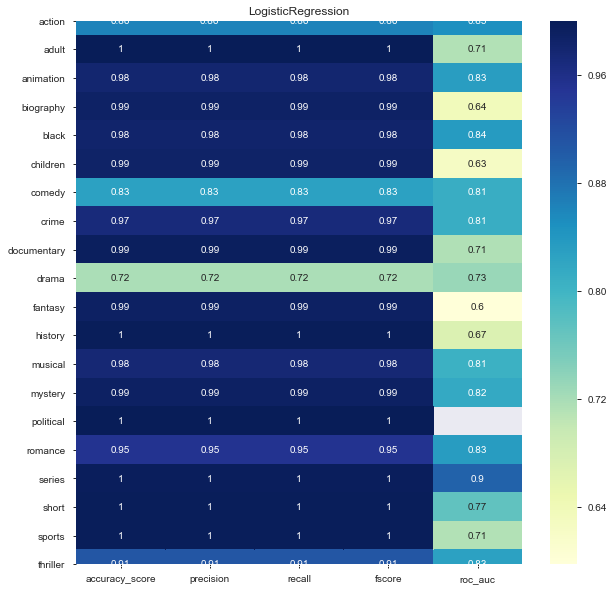

C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


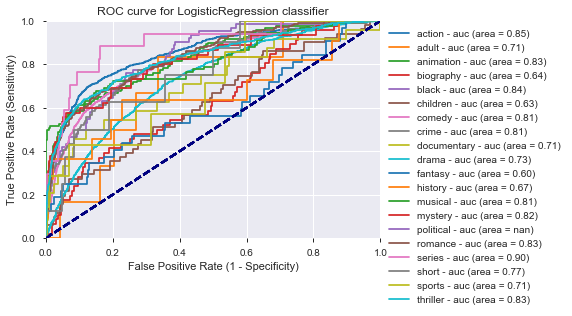

In [76]:
show_metrics("LogisticRegression",clf_lr, yval, y_pred_lr, xval_tfidf)

### MultinomialNB Classifier

In [77]:
mnb = MultinomialNB(fit_prior=True, class_prior=None)
clf_mnb = OneVsRestClassifier(mnb, n_jobs=-1)
clf_mnb.get_params().keys()

dict_keys(['estimator__alpha', 'estimator__class_prior', 'estimator__fit_prior', 'estimator', 'n_jobs'])

#### Grid Search - Hyperparameter Tuning

In [78]:
parameters = {
    'estimator__alpha': [1e-3, 1e-2, 1e-1, 1., 10., 100.],
    'estimator__fit_prior': [True, False],
    'n_jobs':[-1]
}

In [79]:
clf_mb, best_params, y_pred_mnb = grid_search_func(clf_mnb, parameters, xtrain_tfidf, ytrain)

C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


#### Best Parameters

In [80]:
best_params

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__alpha,param_estimator__fit_prior,param_n_jobs,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
8,0.395277,0.019341,0.124364,0.001239,10,True,-1,"{'estimator__alpha': 10.0, 'estimator__fit_pri...",0.300375,0.300428,0.301856,0.300887,0.000686,1
9,0.374378,0.018875,0.124029,0.002484,10,False,-1,"{'estimator__alpha': 10.0, 'estimator__fit_pri...",0.300375,0.300071,0.301142,0.300530,0.000451,2
2,0.429848,0.021684,0.155272,0.018462,0.01,True,-1,"{'estimator__alpha': 0.01, 'estimator__fit_pri...",0.286632,0.276508,0.277936,0.280359,0.004474,3
3,0.410878,0.025610,0.153937,0.003672,0.01,False,-1,"{'estimator__alpha': 0.01, 'estimator__fit_pri...",0.285561,0.275080,0.275437,0.278693,0.004859,4
0,0.446817,0.034312,0.158578,0.020423,0.001,True,-1,"{'estimator__alpha': 0.001, 'estimator__fit_pr...",0.279315,0.273652,0.271153,0.274707,0.003414,5


In [81]:
clf_mnb.fit(xtrain_tfidf, ytrain)
pickle.dump(clf_mnb, open('model/MultinomialNB_classifier.pkl', 'wb'))

In [82]:
result_mnb_df = metrics_df("MultinomialNB",clf_mnb, yval, y_pred_mnb, xval_tfidf)
result_mnb_df

,genre,accuracy_score,precision,recall,fscore,roc_auc,classifier
0,action,0.861257,0.861257,0.861257,0.861257,0.814896,MultinomialNB
1,adult,0.998572,0.998572,0.998572,0.998572,0.716476,MultinomialNB
2,animation,0.980485,0.980485,0.980485,0.980485,0.829757,MultinomialNB
3,biography,0.988577,0.988577,0.988577,0.988577,0.613919,MultinomialNB
4,black,0.984293,0.984293,0.984293,0.984293,0.837120,MultinomialNB
5,children,0.987625,0.987625,0.987625,0.987625,0.630198,MultinomialNB
6,comedy,0.801285,0.801285,0.801285,0.801285,0.779189,MultinomialNB
7,crime,0.972394,0.972394,0.972394,0.972394,0.818837,MultinomialNB
8,documentary,0.994050,0.994050,0.994050,0.994050,0.687829,MultinomialNB
9,drama,0.709900,0.709900,0.709900,0.709900,0.718280,MultinomialNB


#### Plot Metrics

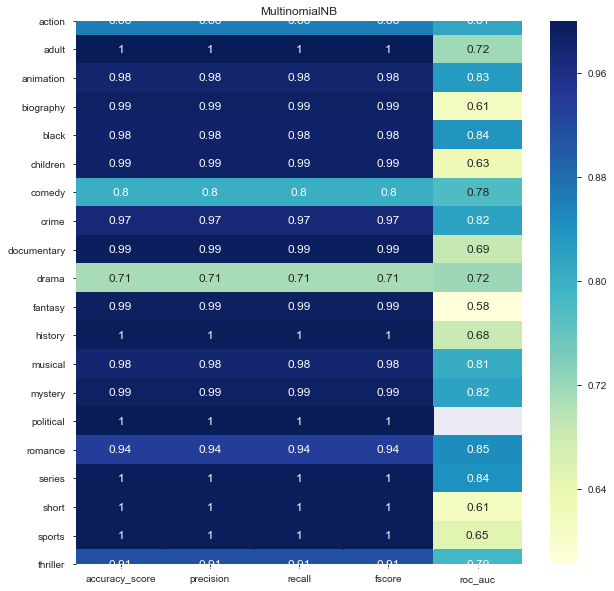

C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


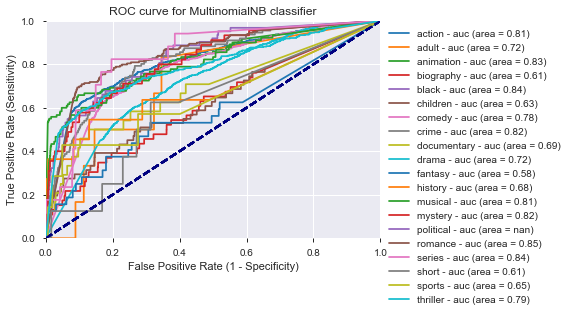

In [83]:
show_metrics("MultinomialNB",clf_mnb, yval, y_pred_mnb, xval_tfidf)

### Linear SVC

In [84]:
lsvc = LinearSVC()
clf_lsvc = OneVsRestClassifier(lsvc, n_jobs=-1)
clf_lsvc.get_params().keys()

dict_keys(['estimator__C', 'estimator__class_weight', 'estimator__dual', 'estimator__fit_intercept', 'estimator__intercept_scaling', 'estimator__loss', 'estimator__max_iter', 'estimator__multi_class', 'estimator__penalty', 'estimator__random_state', 'estimator__tol', 'estimator__verbose', 'estimator', 'n_jobs'])

#### Grid Search - Hyperparameter Tuning

In [85]:
parameters = {
    'estimator__penalty': ["l1", "l2"],
    'estimator__loss': ["hinge", "squared_hinge"],
    'estimator__dual': [True, False],
    'estimator__tol': [1e-2],
    'estimator__C': [ 0.5, 1., 5.],
    "n_jobs":[-1]
}

In [86]:
clf_lsvc, best_params, y_pred_lsvc = grid_search_func(clf_lsvc, parameters, xtrain_tfidf, ytrain)

C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\sklearn\model_selection\_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\sklearn\model_selection\_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError: Unsupported set of arguments: The co

C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\sklearn\model_selection\_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\sklearn\model_selection\_validation.py:545: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\sklearn\model_selection\_validation.py:545: FitFailedWarning: Estimator fit 

#### Best Parameters

In [87]:
best_params

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__C,param_estimator__dual,param_estimator__loss,param_estimator__penalty,param_estimator__tol,param_n_jobs,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
23,5.884416,0.435836,0.060508,0.004098,5,False,squared_hinge,l2,0.01,-1,"{'estimator__C': 5.0, 'estimator__dual': False...",0.334285,0.336308,0.325777,0.332124,0.004563,1
7,6.636214,0.032456,0.057533,0.000923,0.5,False,squared_hinge,l2,0.01,-1,"{'estimator__C': 0.5, 'estimator__dual': False...",0.334464,0.334702,0.326669,0.331945,0.003732,2
15,6.427999,0.271911,0.056196,0.002877,1,False,squared_hinge,l2,0.01,-1,"{'estimator__C': 1.0, 'estimator__dual': False...",0.333571,0.334880,0.327026,0.331826,0.003436,3
3,8.393228,1.371270,0.062844,0.010638,0.5,True,squared_hinge,l2,0.01,-1,"{'estimator__C': 0.5, 'estimator__dual': True,...",0.320900,0.323277,0.316494,0.320224,0.002810,4
11,7.920719,0.661588,0.070492,0.003070,1,True,squared_hinge,l2,0.01,-1,"{'estimator__C': 1.0, 'estimator__dual': True,...",0.319650,0.323099,0.315780,0.319510,0.002989,5


In [88]:
clf_lsvc.fit(xtrain_tfidf, ytrain)
pickle.dump(clf_lsvc, open('model/LinearSVC_classifier.pkl', 'wb'))

In [89]:
result_lsvc_df = metrics_df("LinearSVC", clf_lsvc,yval, y_pred_lsvc, xval_tfidf)
result_lsvc_df

,genre,accuracy_score,precision,recall,fscore,roc_auc,classifier
0,action,0.855307,0.855307,0.855307,0.855307,0.833897,LinearSVC
1,adult,0.996430,0.996430,0.996430,0.996430,0.657650,LinearSVC
2,animation,0.979296,0.979296,0.979296,0.979296,0.863110,LinearSVC
3,biography,0.986911,0.986911,0.986911,0.986911,0.631910,LinearSVC
4,black,0.978582,0.978582,0.978582,0.978582,0.837845,LinearSVC
5,children,0.984531,0.984531,0.984531,0.984531,0.647654,LinearSVC
6,comedy,0.819372,0.819372,0.819372,0.819372,0.806026,LinearSVC
7,crime,0.966445,0.966445,0.966445,0.966445,0.808543,LinearSVC
8,documentary,0.993099,0.993099,0.993099,0.993099,0.729177,LinearSVC
9,drama,0.702285,0.702285,0.702285,0.702285,0.714374,LinearSVC


#### Ploting Metrics

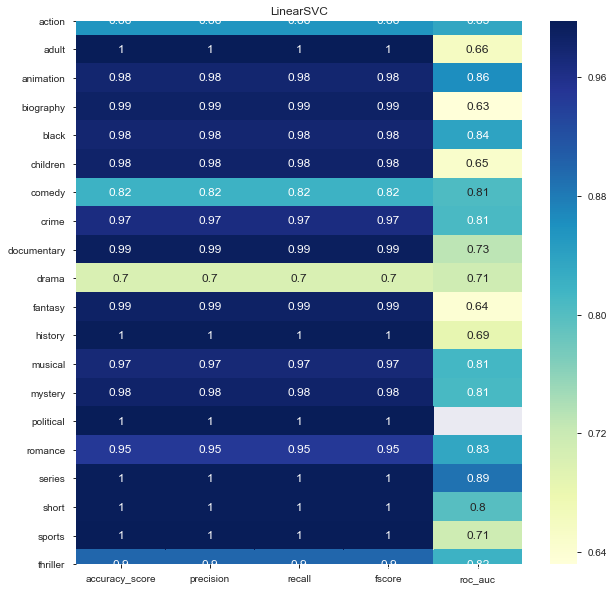

C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


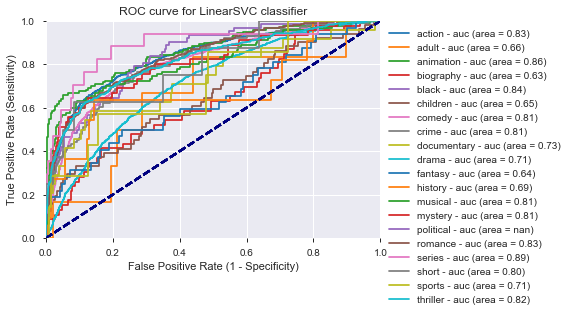

In [90]:
show_metrics("LinearSVC", clf_lsvc,yval, y_pred_lsvc, xval_tfidf)

### Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
clf_dtc = DecisionTreeClassifier(random_state=0)
clf_dtc.get_params().keys()

dict_keys(['class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

#### Grid Search - Hyperparameter Tuning

In [93]:
parameters = {
    'criterion': ["gini", "entropy"],
    'max_depth': range(8, 10)
}

In [94]:
clf_dtc, best_params, y_pred_dtc = grid_search_func(clf_dtc, parameters, xtrain_tfidf, ytrain)

C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


#### Best Paramters

In [95]:
best_params

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,7.895217,0.294324,0.048869,0.002821,entropy,9,"{'criterion': 'entropy', 'max_depth': 9}",0.095128,0.106034,0.093181,0.098114,0.005656,1
1,4.142920,0.063013,0.046220,0.001241,gini,9,"{'criterion': 'gini', 'max_depth': 9}",0.089595,0.097287,0.089254,0.092045,0.003709,2
2,6.277215,0.281925,0.047547,0.001711,entropy,8,"{'criterion': 'entropy', 'max_depth': 8}",0.076031,0.096573,0.088897,0.087166,0.008475,3
0,3.510943,0.047846,0.049867,0.002154,gini,8,"{'criterion': 'gini', 'max_depth': 8}",0.080314,0.078186,0.086219,0.081573,0.003398,4


In [96]:
clf_dtc.fit(xtrain_tfidf, ytrain)
pickle.dump(clf_lsvc, open('model/DecisionTreeClassifier_classifier.pkl', 'wb'))

In [97]:
result_dtc_df = metrics_df("DecisionTreeClassifier", clf_dtc , yval, y_pred_dtc, xval_tfidf)
result_dtc_df

,genre,accuracy_score,precision,recall,fscore,roc_auc,classifier
0,action,0.815088,0.815088,0.815088,0.815088,0.687115,DecisionTreeClassifier
1,adult,0.998572,0.998572,0.998572,0.998572,0.718661,DecisionTreeClassifier
2,animation,0.975488,0.975488,0.975488,0.975488,0.746434,DecisionTreeClassifier
3,biography,0.989053,0.989053,0.989053,0.989053,0.622280,DecisionTreeClassifier
4,black,0.985007,0.985007,0.985007,0.985007,0.672725,DecisionTreeClassifier
5,children,0.987863,0.987863,0.987863,0.987863,0.634411,DecisionTreeClassifier
6,comedy,0.780819,0.780819,0.780819,0.780819,0.653829,DecisionTreeClassifier
7,crime,0.973584,0.973584,0.973584,0.973584,0.669880,DecisionTreeClassifier
8,documentary,0.994288,0.994288,0.994288,0.994288,0.709819,DecisionTreeClassifier
9,drama,0.711804,0.711804,0.711804,0.711804,0.628598,DecisionTreeClassifier


#### Plot Metrics

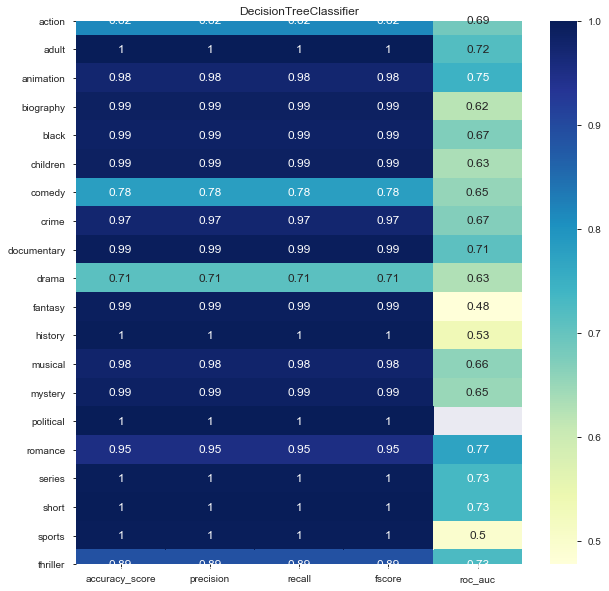

C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


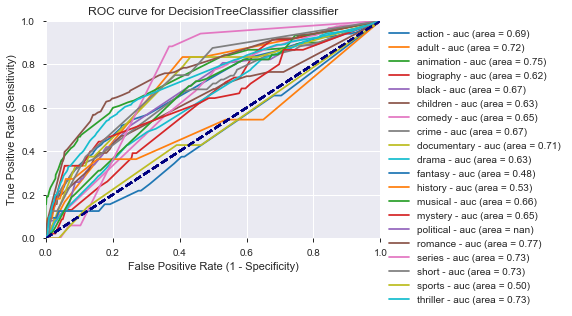

In [98]:
show_metrics("DecisionTreeClassifier",clf_dtc, yval, y_pred_dtc, xval_tfidf)

### Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
clf_rfc = RandomForestClassifier(random_state=0)
clf_rfc.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

#### Grid Search - Hyperparameter Tuning

In [101]:
parameters = {
    'criterion': ["gini", "entropy"],
    'min_samples_split': range(19, 21),
    'min_samples_leaf':  range(19, 21),
    'n_jobs': [-1]
}

In [102]:
clf_rfc, best_params, y_pred_rfc = grid_search_func(clf_rfc, parameters, xtrain_tfidf, ytrain)

C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in 

#### Best Parameters

In [103]:
best_params

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,param_min_samples_split,param_n_jobs,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.417214,0.047080,0.151984,0.001618,gini,19,19,-1,"{'criterion': 'gini', 'min_samples_leaf': 19, ...",0.000178,0.000000,0.000179,0.000119,0.000084,1
1,0.381975,0.029608,0.149145,0.000703,gini,19,20,-1,"{'criterion': 'gini', 'min_samples_leaf': 19, ...",0.000178,0.000000,0.000179,0.000119,0.000084,1
4,0.422891,0.044639,0.149591,0.003720,entropy,19,19,-1,"{'criterion': 'entropy', 'min_samples_leaf': 1...",0.000000,0.000179,0.000000,0.000059,0.000084,3
5,0.417348,0.055219,0.152796,0.000744,entropy,19,20,-1,"{'criterion': 'entropy', 'min_samples_leaf': 1...",0.000000,0.000179,0.000000,0.000059,0.000084,3
2,0.377115,0.014585,0.148335,0.000219,gini,20,19,-1,"{'criterion': 'gini', 'min_samples_leaf': 20, ...",0.000178,0.000000,0.000000,0.000059,0.000084,5


In [104]:
clf_rfc.fit(xtrain_tfidf, ytrain)
pickle.dump(clf_lsvc, open('model/RandomForestClassifier_classifier.pkl', 'wb'))

In [105]:
result_rfc_df = metrics_df("RandomForestClassifier", clf_rfc , yval, y_pred_rfc, xval_tfidf)
result_rfc_df

,genre,accuracy_score,precision,recall,fscore,roc_auc,classifier
0,action,0.811994,0.811994,0.811994,0.811994,0.825006,RandomForestClassifier
1,adult,0.998572,0.998572,0.998572,0.998572,0.675842,RandomForestClassifier
2,animation,0.971442,0.971442,0.971442,0.971442,0.884564,RandomForestClassifier
3,biography,0.989053,0.989053,0.989053,0.989053,0.729098,RandomForestClassifier
4,black,0.985245,0.985245,0.985245,0.985245,0.741764,RandomForestClassifier
5,children,0.987863,0.987863,0.987863,0.987863,0.673143,RandomForestClassifier
6,comedy,0.784388,0.784388,0.784388,0.784388,0.728832,RandomForestClassifier
7,crime,0.973584,0.973584,0.973584,0.973584,0.810434,RandomForestClassifier
8,documentary,0.994288,0.994288,0.994288,0.994288,0.730094,RandomForestClassifier
9,drama,0.709424,0.709424,0.709424,0.709424,0.699560,RandomForestClassifier


#### Plot Metrics

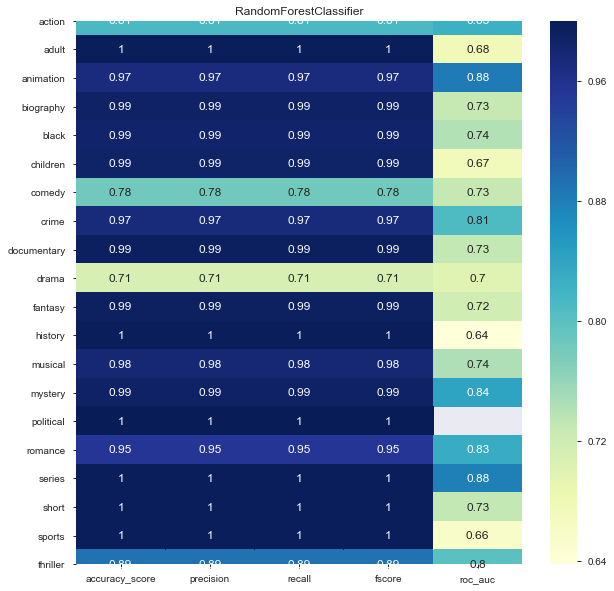

C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


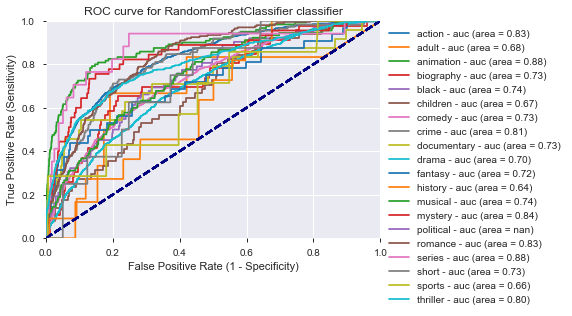

In [106]:
show_metrics("RandomForestClassifier",clf_rfc, yval, y_pred_rfc, xval_tfidf)

### Comparison of Classic ML models

In [107]:
comp = pd.concat([result_lsvc_df, result_mnb_df,result_lr_df, result_rfc_df], ignore_index=True)
comp.head()

,genre,accuracy_score,precision,recall,fscore,roc_auc,classifier
0,action,0.855307,0.855307,0.855307,0.855307,0.833897,LinearSVC
1,adult,0.996430,0.996430,0.996430,0.996430,0.657650,LinearSVC
2,animation,0.979296,0.979296,0.979296,0.979296,0.863110,LinearSVC
3,biography,0.986911,0.986911,0.986911,0.986911,0.631910,LinearSVC
4,black,0.978582,0.978582,0.978582,0.978582,0.837845,LinearSVC


In [108]:
comp.sort_values('accuracy_score').drop_duplicates(['genre'],keep='last')

,genre,accuracy_score,precision,recall,fscore,roc_auc,classifier
49,drama,0.718467,0.718467,0.718467,0.718467,0.729945,LogisticRegression
46,comedy,0.827225,0.827225,0.827225,0.827225,0.811100,LogisticRegression
40,action,0.861970,0.861970,0.861970,0.861970,0.850268,LogisticRegression
39,thriller,0.910995,0.910995,0.910995,0.910995,0.789052,MultinomialNB
75,romance,0.952642,0.952642,0.952642,0.952642,0.831564,RandomForestClassifier
67,crime,0.973584,0.973584,0.973584,0.973584,0.810434,RandomForestClassifier
72,musical,0.978582,0.978582,0.978582,0.978582,0.744057,RandomForestClassifier
42,animation,0.980961,0.980961,0.980961,0.980961,0.832605,LogisticRegression
64,black,0.985245,0.985245,0.985245,0.985245,0.741764,RandomForestClassifier
65,children,0.987863,0.987863,0.987863,0.987863,0.673143,RandomForestClassifier


[Text(0, 0, 'drama'),
 Text(0, 0, 'comedy'),
 Text(0, 0, 'action'),
 Text(0, 0, 'thriller'),
 Text(0, 0, 'romance'),
 Text(0, 0, 'crime'),
 Text(0, 0, 'musical'),
 Text(0, 0, 'animation'),
 Text(0, 0, 'children'),
 Text(0, 0, 'fantasy'),
 Text(0, 0, 'mystery'),
 Text(0, 0, 'biography'),
 Text(0, 0, 'black'),
 Text(0, 0, 'history'),
 Text(0, 0, 'short'),
 Text(0, 0, 'documentary'),
 Text(0, 0, 'sports'),
 Text(0, 0, 'series'),
 Text(0, 0, 'adult'),
 Text(0, 0, 'political')]

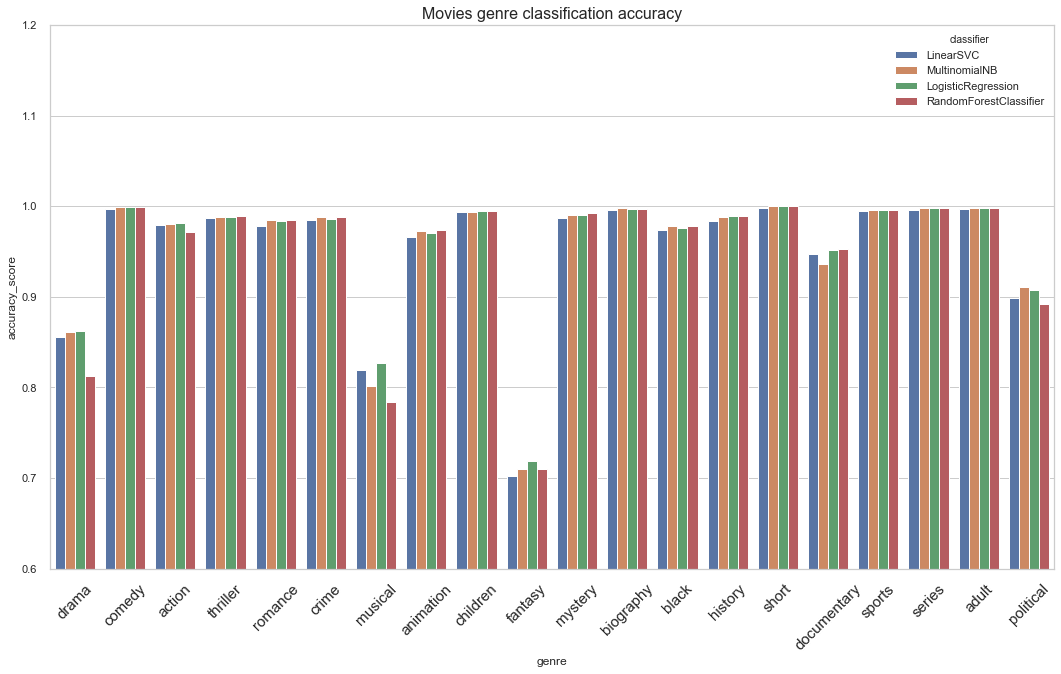

In [109]:
sns.set(rc={'figure.figsize':(18,10)})
sns.set(style="whitegrid")
plt.ylim(.6, 1.2)
s = sns.barplot(x="genre", y="accuracy_score", hue="classifier", data=comp) 
s.set_title('Movies genre classification accuracy', size=16)
s.set_xticklabels(list(mainGenres) ,rotation=45, size=15)

In [110]:
text = '''
Tony Stark, who has inherited the defense contractor Stark Industries from his father, is in war-torn Afghanistan with his friend and military liaison, Lieutenant Colonel James Rhodes, to demonstrate the new "Jericho" missile. After the demonstration, the convoy is ambushed and Stark is critically wounded by a missile used by the attackers: one of his company's own. He is captured and imprisoned in a cave by a terrorist group called the Ten Rings. Yinsen, a fellow captive doctor, implants an electromagnet into Stark's chest to keep the shrapnel shards that wounded him from reaching his heart and killing him. Ten Rings leader Raza offers Stark freedom in exchange for building a Jericho missile for the group, but Tony and Yinsen know that Raza will not keep his word.

Stark and Yinsen secretly build a small, powerful electric generator called an arc reactor to power Stark's electromagnet and a prototypical suit of powered armor to aid in their escape. Although they keep the suit hidden almost to completion, the Ten Rings discover their hostages' intentions and attack the workshop. Yinsen sacrifices himself to divert them while the suit is completed. The armored Stark battles his way out of the cave to find the dying Yinsen, then burns the Ten Rings' weapons in anger and flies away, crashing in the desert and destroying the suit. After being rescued by Rhodes, Stark returns home and announces that his company will cease manufacturing weapons. Obadiah Stane, his father's old partner and the company's manager, advises Stark that this may ruin Stark Industries and his father's legacy. In his home workshop, Stark builds a sleeker, more powerful version of his improvised armor suit as well as a more powerful arc reactor for his chest. Personal assistant Pepper Potts places the original reactor inside a small glass showcase. Though Stane requests details, a suspicious Stark decides to keep his work to himself.

At a charity event held by Stark Industries, reporter Christine Everhart informs Stark that his company's weapons were recently delivered to the Ten Rings and are being used to attack Yinsen's home village, Gulmira. Stark dons his new armor and flies to Afghanistan, where he saves the villagers. While flying home, Stark is attacked by two fighter jets. He reveals his secret identity to Rhodes over the phone in an attempt to end the attack. Meanwhile, the Ten Rings gather the pieces of Stark's prototype suit and meet with Stane, who has been trafficking arms to criminals worldwide and has staged a coup to replace Stark as Stark Industries' CEO by hiring the Ten Rings to kill him. He subdues Raza and has the rest of the group killed. Stane has a massive new suit reverse engineered from the wreckage. Seeking to track his company's illegal shipments, Stark sends Potts to hack into its database. She discovers that Stane hired the Ten Rings to kill Stark, but the group reneged. Potts meets with Agent Phil Coulson of S.H.I.E.L.D., an intelligence agency, to inform him of Stane's activities.

Stane's scientists cannot duplicate Stark's miniaturized arc reactor, so Stane ambushes Stark at his home and takes the one from his chest. Stark manages to get to his original reactor to replace it. Potts and several S.H.I.E.L.D. agents attempt to arrest Stane, but he dons his suit and attacks them. Stark fights Stane but is outmatched without his new reactor to run his suit at full capacity. The fight carries Stark and Stane to the top of the Stark Industries building, and Stark instructs Potts to overload the large arc reactor powering the building. This unleashes a massive electrical surge that causes Stane and his armor to fall into the exploding reactor, killing him. The next day, at a press conference, Stark defies suggestions from S.H.I.E.L.D. and publicly admits to being "Iron Man."

In a post-credits scene, S.H.I.E.L.D. Director Nick Fury visits Stark at home, telling him that Iron Man is not "the only superhero in the world", and explaining that he wants to discuss the "Avenger Initiative".

'''

In [111]:
test = multilabel_binarizer.inverse_transform(y_pred_lr)[0] + multilabel_binarizer.inverse_transform(y_pred_lsvc)[0] + multilabel_binarizer.inverse_transform(y_pred_mnb)[0]
print(set(test))

{'drama'}


# Neural Networks ML Classifiers

## Keras Embedding and Word2Vec

<h3>Word Embedding</h3>

<p>A word embedding is a class of approaches for representing words and documents using a dense vector representation.</p>

<p>It is an improvement over more the traditional bag-of-word model encoding schemes where large sparse vectors were used to represent each word or to score each word within a vector to represent an entire vocabulary. These representations were sparse because the vocabularies were vast and a given word or document would be represented by a large vector comprised mostly of zero values.</p>

<p>Instead, in an embedding, words are represented by dense vectors where a vector represents the projection of the word into a continuous vector space.</p>

<p>The position of a word within the vector space is learned from text and is based on the words that surround the word when it is used.</p>

<p>The position of a word in the learned vector space is referred to as its embedding.</p>

<p>Two popular examples of methods of learning word embeddings from text include:</p>

<ul>
	<li>Word2Vec.</li>
	<li>GloVe.</li>
</ul>

<p>In addition to these carefully designed methods, a word embedding can be learned as part of a deep learning model. This can be a slower approach, but tailors the model to a specific training dataset.</p>
</section>


<h3>Keras Embedding Layer</h3>

<p>Keras offers an&nbsp;<a href="https://keras.io/layers/embeddings/#embedding">Embedding</a>&nbsp;layer that can be used for neural networks on text data.</p>

<p>It requires that the input data be integer encoded, so that each word is represented by a unique integer. This data preparation step can be performed using the&nbsp;<a href="https://keras.io/preprocessing/text/#tokenizer">Tokenizer API</a>&nbsp;also provided with Keras.</p>

<p>The Embedding layer is initialized with random weights and will learn an embedding for all of the words in the training dataset.</p>

<p>It is a flexible layer that can be used in a variety of ways, such as:</p>

<ul>
	<li>It can be used alone to learn a word embedding that can be saved and used in another model later.</li>
	<li>It can be used as part of a deep learning model where the embedding is learned along with the model itself.</li>
	<li>It can be used to load a pre-trained word embedding model, a type of transfer learning.</li>
</ul>

<p>The Embedding layer is defined as the first hidden layer of a network. It must specify 3 arguments:</p>

<p>It must specify 3 arguments:</p>

<ul>
	<li><strong>input_dim</strong>: This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.</li>
	<li><strong>output_dim</strong>: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.</li>
	<li><strong>input_length</strong>: This is the length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.</li>
</ul>

<p>For example, below we define an Embedding layer with a vocabulary of 200 (e.g. integer encoded words from 0 to 199, inclusive), a vector space of 32 dimensions in which words will be embedded, and input documents that have 50 words each.</p>

<table>
	<tbody>
		<tr>
			<td data-settings="show">
			<p>1</p>
			</td>
			<td>
			<p>e = Embedding(200, 32, input_length=50)</p>
			</td>
		</tr>
	</tbody>
</table>

<p>The Embedding layer has weights that are learned. If you save your model to file, this will include weights for the Embedding layer.</p>

<p>The output of the&nbsp;<em>Embedding</em>&nbsp;layer is a 2D vector with one embedding for each word in the input sequence of words (input document).</p>

<p>If you wish to connect a&nbsp;<em>Dense</em>&nbsp;layer directly to an Embedding layer, you must first flatten the 2D output matrix to a 1D vector using the&nbsp;<em>Flatten</em>&nbsp;layer.</p>


### Helper Functions

Plots the model accuracy and training & validation loss values graphs

In [112]:
def plot_model_acc(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

### One Hot Method

In [113]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

Using TensorFlow backend.


In [114]:
docs = movies['Plot_correction']
labels = y

In [115]:
vocab_size = 1000
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [116]:
# Spliting data into into train and test
(X_train, X_test, Y_train, Y_test) = train_test_split(padded_docs, labels, test_size=0.2, random_state=1)
# Spliting data from train to train and validate sets
(X_train, X_val, y_train, y_val) = train_test_split(X_train, Y_train, test_size=0.2, random_state=1)

In [117]:
vocab_size = 1000
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)
# define the model
model1 = Sequential()
model1.add(Embedding(vocab_size, 8, input_length=max_length))
model1.add(Flatten())
model1.add(Dense(20, activation='sigmoid'))
# compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
print(model1.summary())
# fit the model
history1 = model1.fit(X_train, y_train,validation_data=(X_val, y_val), epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model1.evaluate(X_val, y_val, verbose=0)
print('Accuracy: %f' % (accuracy*100))

W0814 12:42:13.047333 12888 deprecation_wrapper.py:119] From C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0814 12:42:13.059301 12888 deprecation_wrapper.py:119] From C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0814 12:42:13.062294 12888 deprecation_wrapper.py:119] From C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0814 12:42:13.098224 12888 deprecation_wrapper.py:119] From C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4, 8)              8000      
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                660       
Total params: 8,660
Trainable params: 8,660
Non-trainable params: 0
_________________________________________________________________
None
Accuracy: 94.109162


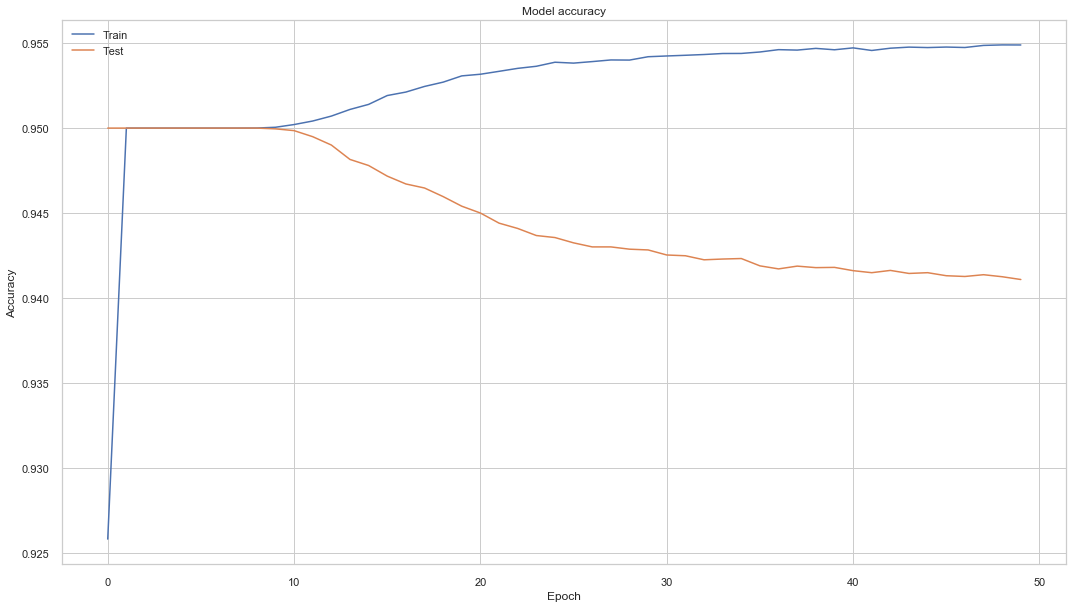

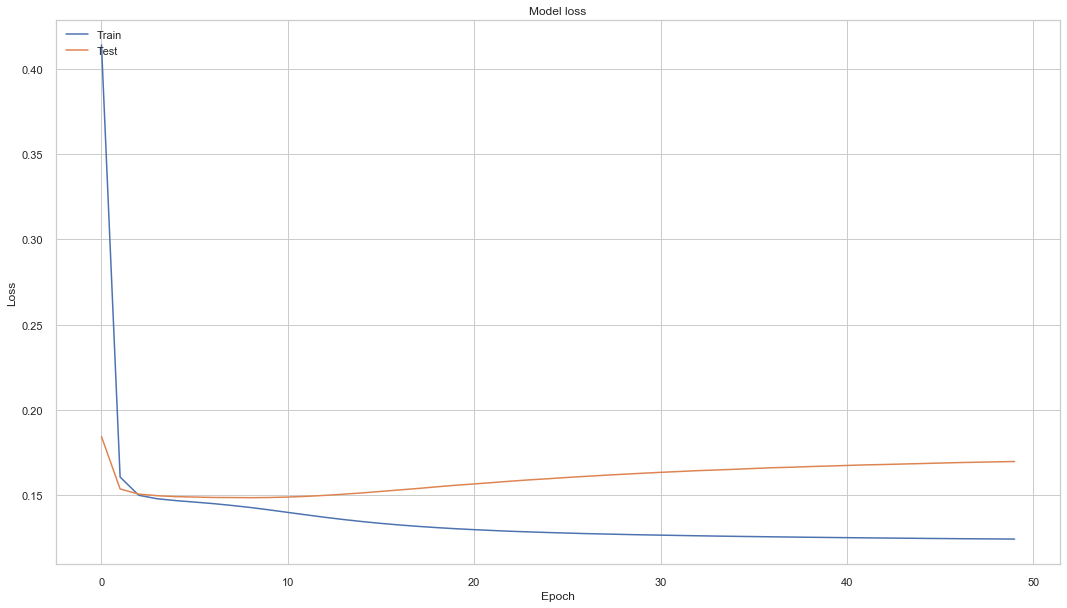

In [118]:
plot_model_acc(history1)

In [119]:
pickle.dump(model1, open('model/NueralNetworkClassifier_OneHot_classifier.pkl', 'wb'))

In [120]:
y_pred_keras_one_hot = model1.predict(X_test)

In [121]:
y_pred_keras_one_hot = y_pred_keras_one_hot.round(decimals=0, out=None)

In [122]:
result_keras_one_hot_df = metrics_df("NueralNetworkClassifier_OneHot", model1 , yval, y_pred_keras_one_hot, X_test)
result_keras_one_hot_df

,genre,accuracy_score,precision,recall,fscore,roc_auc,classifier
0,action,0.759876,0.759876,0.759876,0.759876,0.499344,NueralNetworkClassifier_OneHot
1,adult,0.998572,0.998572,0.998572,0.998572,0.582261,NueralNetworkClassifier_OneHot
2,animation,0.970966,0.970966,0.970966,0.970966,0.539447,NueralNetworkClassifier_OneHot
3,biography,0.989053,0.989053,0.989053,0.989053,0.544537,NueralNetworkClassifier_OneHot
4,black,0.985245,0.985245,0.985245,0.985245,0.547662,NueralNetworkClassifier_OneHot
5,children,0.987863,0.987863,0.987863,0.987863,0.602609,NueralNetworkClassifier_OneHot
6,comedy,0.722989,0.722989,0.722989,0.722989,0.496825,NueralNetworkClassifier_OneHot
7,crime,0.973584,0.973584,0.973584,0.973584,0.495944,NueralNetworkClassifier_OneHot
8,documentary,0.994288,0.994288,0.994288,0.994288,0.488387,NueralNetworkClassifier_OneHot
9,drama,0.634460,0.634460,0.634460,0.634460,0.495306,NueralNetworkClassifier_OneHot


#### Plot Metrics

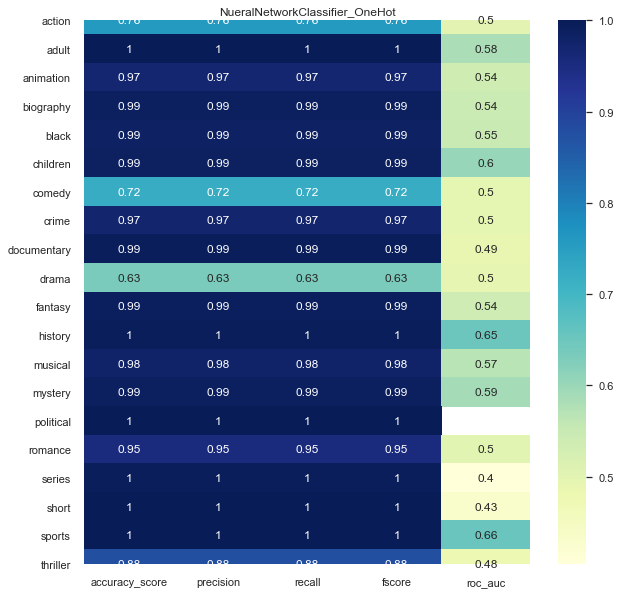

C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


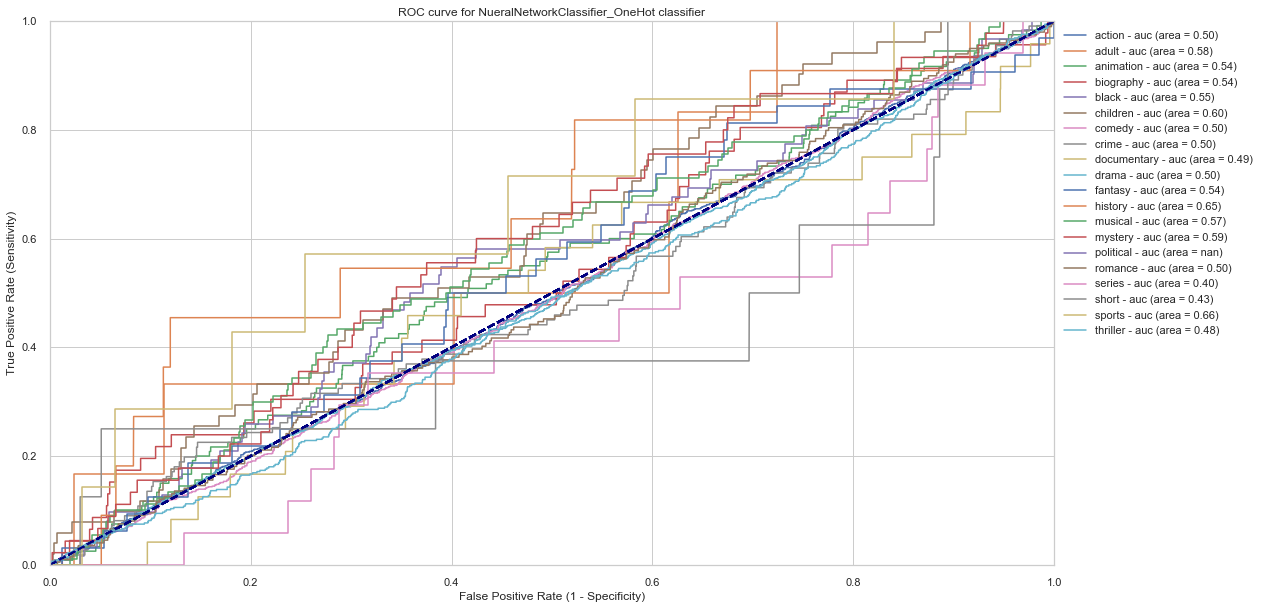

In [123]:
show_metrics("NueralNetworkClassifier_OneHot",model1, yval, y_pred_keras_one_hot, X_test)

### TDIF Method

In [124]:
from keras.preprocessing.text import Tokenizer

In [125]:
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)

In [126]:
# summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)
# integer encode documents
encoded_docs = t.texts_to_matrix(docs, mode='tfidf')
print(encoded_docs)
vocab_size = 1000
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 100
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[0.         0.         1.16362225 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.17109717 0.         ... 9.25965421 9.25965421 0.        ]
 [0.         1.17109717 0.         ... 0.         0.         9.25965421]]
[[0.         0.         1.16362225 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.17109717 0.         ... 9.25965421 9.25965421 0.        ]
 [0.         1.17109717 0.         ... 0.         0.         9.25965421]]


In [127]:
# Spliting data into into train and test
(X_train, X_test, Y_train, Y_test) = train_test_split(padded_docs, labels, test_size=0.2, random_state=1)
# Spliting data from train to train and validate sets
(X_train, X_val, y_train, y_val) = train_test_split(X_train, Y_train, test_size=0.2, random_state=1)

In [128]:
vocab_size = 1000
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 100
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)
# define the model
model2 = Sequential()
model2.add(Embedding(vocab_size, 8, input_length=max_length))
model2.add(Flatten())
model2.add(Dense(20, activation='sigmoid'))
# compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
print(model2.summary())
# fit the model
history2 = model2.fit(X_train, y_train,validation_data=(X_val, y_val), epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model2.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

[[0.         0.         1.16362225 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.17109717 0.         ... 9.25965421 9.25965421 0.        ]
 [0.         1.17109717 0.         ... 0.         0.         9.25965421]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 9 9 0]
 [0 0 0 ... 0 0 9]]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 8)            8000      
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 20) 

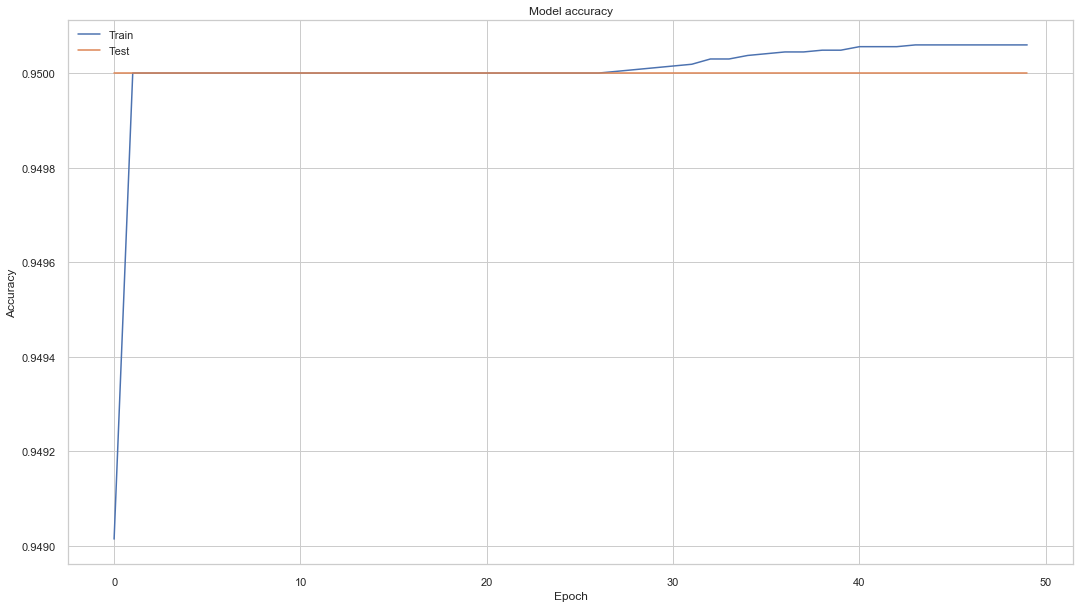

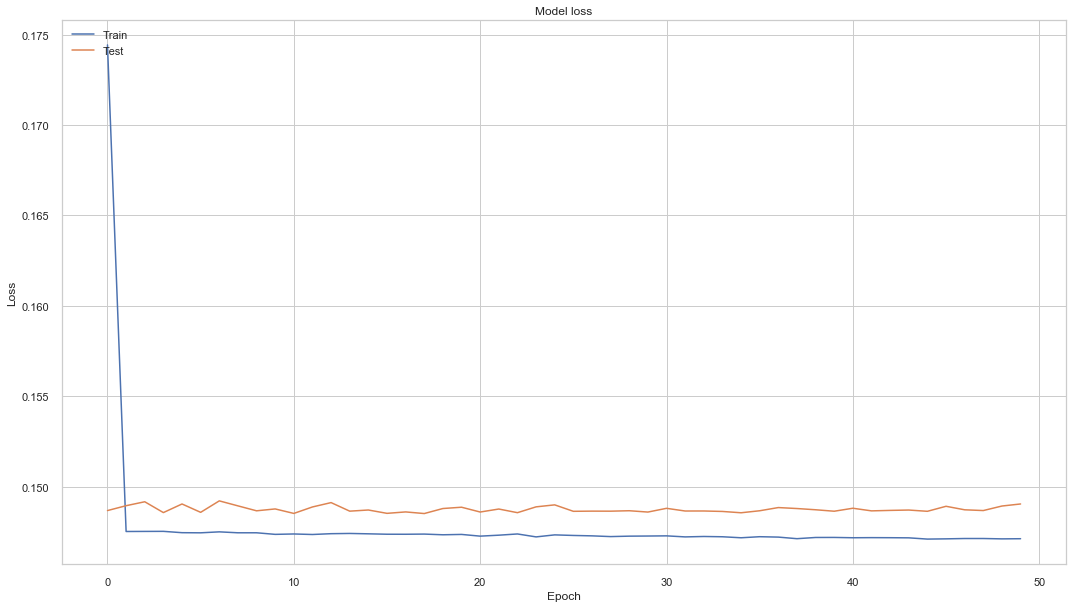

In [129]:
plot_model_acc(history2)

In [130]:
pickle.dump(model2, open('model/NueralNetworkClassifier_TDIF_classifier.pkl', 'wb'))

In [131]:
y_pred_keras_tdif = model2.predict(X_test)

In [132]:
y_pred_keras_tdif = y_pred_keras_tdif.round(decimals=0, out=None)

In [133]:
result_keras_tdif_df = metrics_df("NueralNetworkClassifier_TDIF", model2 , yval, y_pred_keras_tdif, X_test)
result_keras_tdif_df

,genre,accuracy_score,precision,recall,fscore,roc_auc,classifier
0,action,0.811756,0.811756,0.811756,0.811756,0.498545,NueralNetworkClassifier_TDIF
1,adult,0.998572,0.998572,0.998572,0.998572,0.469971,NueralNetworkClassifier_TDIF
2,animation,0.971442,0.971442,0.971442,0.971442,0.496931,NueralNetworkClassifier_TDIF
3,biography,0.989053,0.989053,0.989053,0.989053,0.524501,NueralNetworkClassifier_TDIF
4,black,0.985245,0.985245,0.985245,0.985245,0.477731,NueralNetworkClassifier_TDIF
5,children,0.987863,0.987863,0.987863,0.987863,0.501205,NueralNetworkClassifier_TDIF
6,comedy,0.784388,0.784388,0.784388,0.784388,0.505374,NueralNetworkClassifier_TDIF
7,crime,0.973584,0.973584,0.973584,0.973584,0.514781,NueralNetworkClassifier_TDIF
8,documentary,0.994288,0.994288,0.994288,0.994288,0.490745,NueralNetworkClassifier_TDIF
9,drama,0.709424,0.709424,0.709424,0.709424,0.495807,NueralNetworkClassifier_TDIF


#### Ploting Metrics

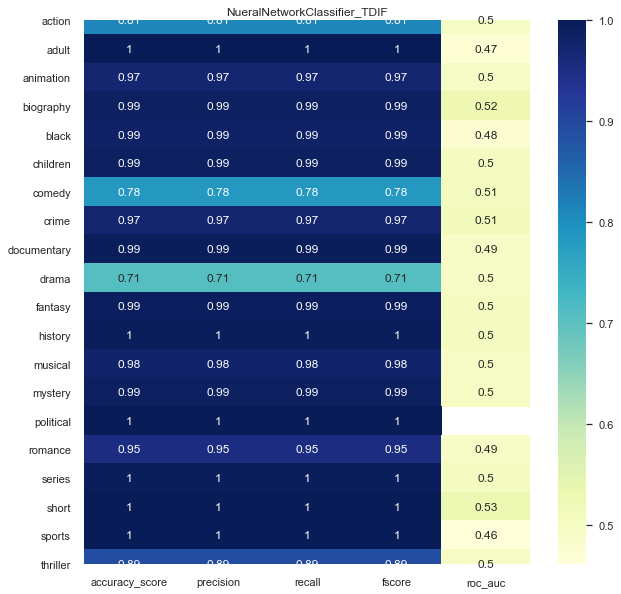

C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


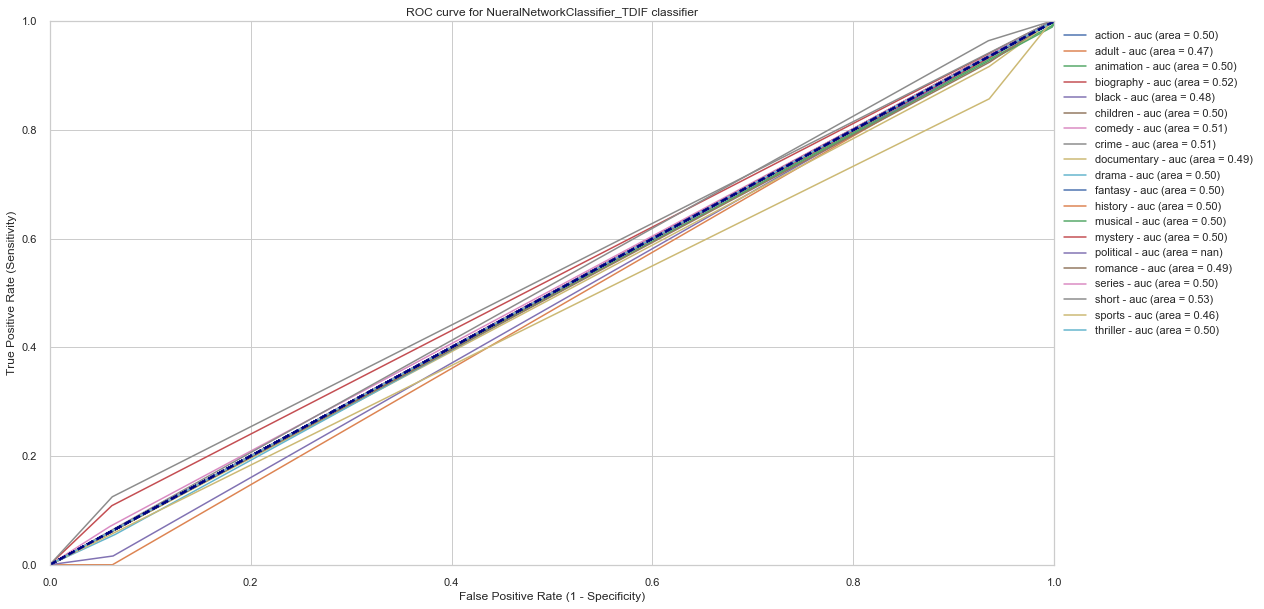

In [134]:
show_metrics("NueralNetworkClassifier_TDIF",model2, yval, y_pred_keras_tdif, X_test)

In [135]:
test_text = t.texts_to_matrix(text, mode='tfidf')
max_length = 100
test_text = pad_sequences(test_text, maxlen=max_length, padding='post')

In [136]:
y_pred_keras = model2.predict(test_text)

In [137]:
docs = movies

### Extended Learning Method

In [138]:
docs['Plot_correction'] = docs['Plot_correction'].apply(lambda x : str(x.encode(encoding='UTF-8',errors='strict').decode("utf-8") ))
# docs.head()

In [139]:
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

In [140]:
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs['Plot_correction'].values)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs['Plot_correction'].values)
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [141]:
print(padded_docs)
# load the whole embedding into memory
embeddings_index = dict()
f = open('glove_6B/glove.6B.300d.txt', encoding="utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 300))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        

# Spliting data into into train and test
(X_train, X_test, Y_train, Y_test) = train_test_split(padded_docs, labels, test_size=0.2, random_state=1)
# Spliting data from train to train and validate sets
(X_train, X_val, y_train, y_val) = train_test_split(X_train, Y_train, test_size=0.2, random_state=1)



# define model
model3 = Sequential()
e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length, trainable=False)
model3.add(e)
model3.add(Flatten())
model3.add(Dense(20, activation='sigmoid'))
# compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
print(model3.summary())
# fit the model
history3 = model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=0)
# evaluate the model
loss, accuracy = model3.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

[[    26   1870    517   3135]
 [  1867  38063    549    434]
 [  1443    319    814    532]
 ...
 [120410   3023   1977    856]
 [ 57129      1    270     95]
 [    11     21    293     12]]
Loaded 400000 word vectors.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 4, 300)            36125100  
_________________________________________________________________
flatten_3 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                24020     
Total params: 36,149,120
Trainable params: 24,020
Non-trainable params: 36,125,100
_________________________________________________________________
None
Accuracy: 95.107573


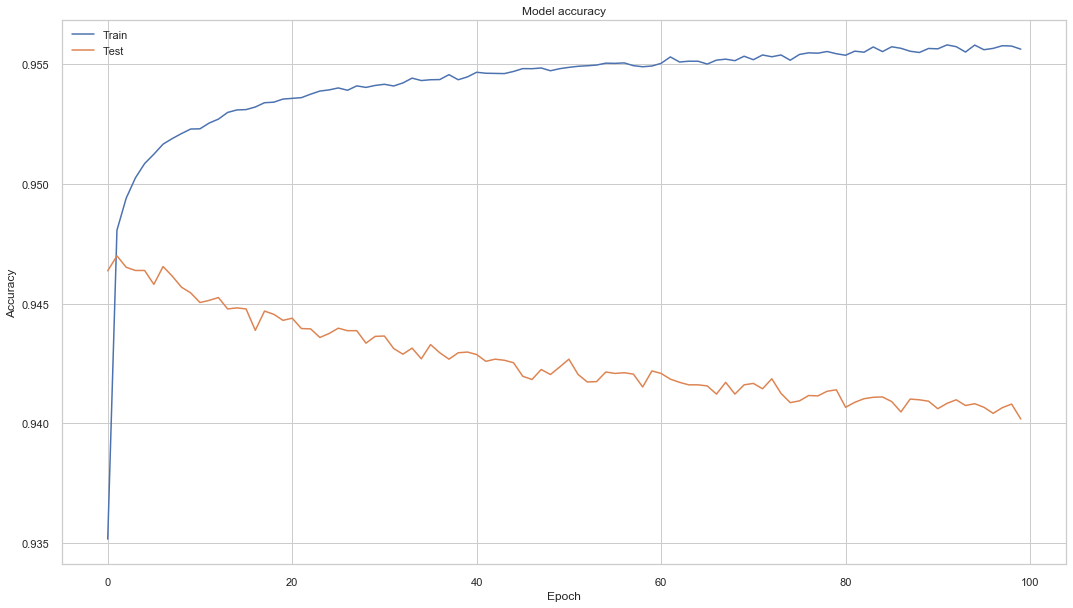

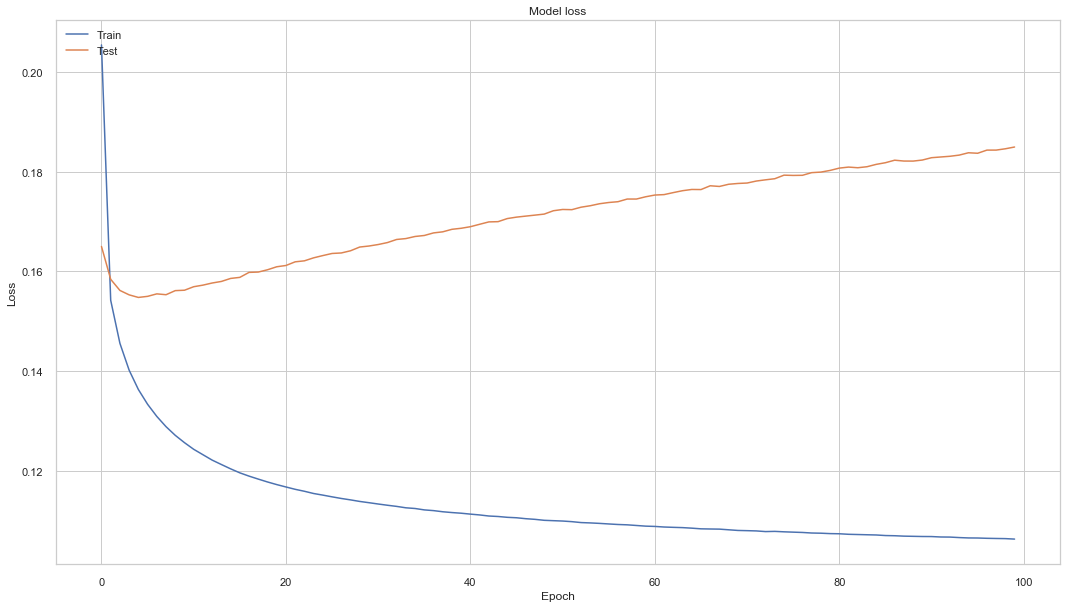

In [142]:
plot_model_acc(history3)

In [143]:
pickle.dump(model3, open('model/NueralNetworkClassifier_extended_classifier.pkl', 'wb'))

In [144]:
y_pred_keras_extended = model3.predict(X_test)

In [145]:
y_pred_keras_extended = y_pred_keras_extended.round(decimals=0, out=None)

In [146]:
result_keras_extend_df = metrics_df("NueralNetworkClassifier_extended", model3 , yval, y_pred_keras_extended, X_test)
result_keras_extend_df

,genre,accuracy_score,precision,recall,fscore,roc_auc,classifier
0,action,0.769871,0.769871,0.769871,0.769871,0.509293,NueralNetworkClassifier_extended
1,adult,0.995954,0.995954,0.995954,0.995954,0.521469,NueralNetworkClassifier_extended
2,animation,0.956449,0.956449,0.956449,0.956449,0.452361,NueralNetworkClassifier_extended
3,biography,0.978106,0.978106,0.978106,0.978106,0.463722,NueralNetworkClassifier_extended
4,black,0.978106,0.978106,0.978106,0.978106,0.503004,NueralNetworkClassifier_extended
5,children,0.978582,0.978582,0.978582,0.978582,0.484523,NueralNetworkClassifier_extended
6,comedy,0.749643,0.749643,0.749643,0.749643,0.513032,NueralNetworkClassifier_extended
7,crime,0.963827,0.963827,0.963827,0.963827,0.463189,NueralNetworkClassifier_extended
8,documentary,0.984769,0.984769,0.984769,0.984769,0.542011,NueralNetworkClassifier_extended
9,drama,0.662542,0.662542,0.662542,0.662542,0.488545,NueralNetworkClassifier_extended


#### Ploting Metrics

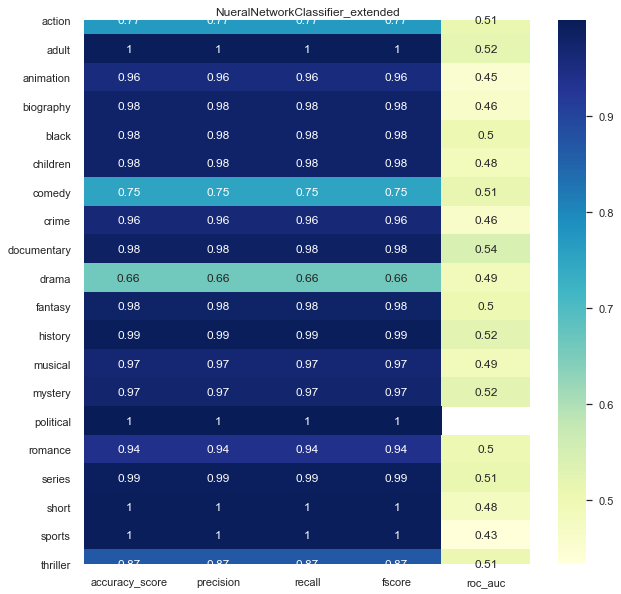

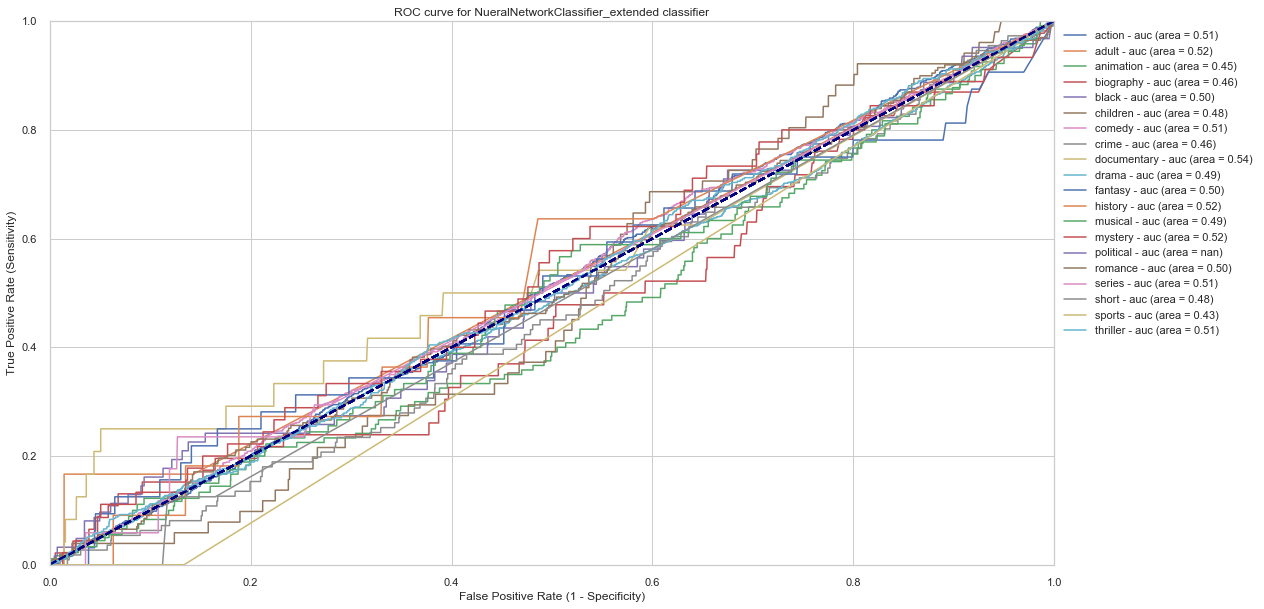

In [147]:
show_metrics("NueralNetworkClassifier_extended",model3, yval, y_pred_keras_extended, X_test)

### Comparing Accuracies of Nueral network Methods

In [148]:
comp = pd.concat([result_keras_one_hot_df, result_keras_tdif_df, result_keras_extend_df], ignore_index=True)
comp.sort_values('fscore').drop_duplicates(['genre'],keep='last')

,genre,accuracy_score,precision,recall,fscore,roc_auc,classifier
29,drama,0.709424,0.709424,0.709424,0.709424,0.495807,NueralNetworkClassifier_TDIF
26,comedy,0.784388,0.784388,0.784388,0.784388,0.505374,NueralNetworkClassifier_TDIF
20,action,0.811756,0.811756,0.811756,0.811756,0.498545,NueralNetworkClassifier_TDIF
39,thriller,0.891718,0.891718,0.891718,0.891718,0.500102,NueralNetworkClassifier_TDIF
35,romance,0.952642,0.952642,0.952642,0.952642,0.494507,NueralNetworkClassifier_TDIF
22,animation,0.971442,0.971442,0.971442,0.971442,0.496931,NueralNetworkClassifier_TDIF
7,crime,0.973584,0.973584,0.973584,0.973584,0.495944,NueralNetworkClassifier_OneHot
12,musical,0.978582,0.978582,0.978582,0.978582,0.568555,NueralNetworkClassifier_OneHot
4,black,0.985245,0.985245,0.985245,0.985245,0.547662,NueralNetworkClassifier_OneHot
25,children,0.987863,0.987863,0.987863,0.987863,0.501205,NueralNetworkClassifier_TDIF


[Text(0, 0, 'drama'),
 Text(0, 0, 'comedy'),
 Text(0, 0, 'action'),
 Text(0, 0, 'thriller'),
 Text(0, 0, 'romance'),
 Text(0, 0, 'crime'),
 Text(0, 0, 'musical'),
 Text(0, 0, 'animation'),
 Text(0, 0, 'children'),
 Text(0, 0, 'fantasy'),
 Text(0, 0, 'mystery'),
 Text(0, 0, 'biography'),
 Text(0, 0, 'black'),
 Text(0, 0, 'history'),
 Text(0, 0, 'short'),
 Text(0, 0, 'documentary'),
 Text(0, 0, 'sports'),
 Text(0, 0, 'series'),
 Text(0, 0, 'adult'),
 Text(0, 0, 'political')]

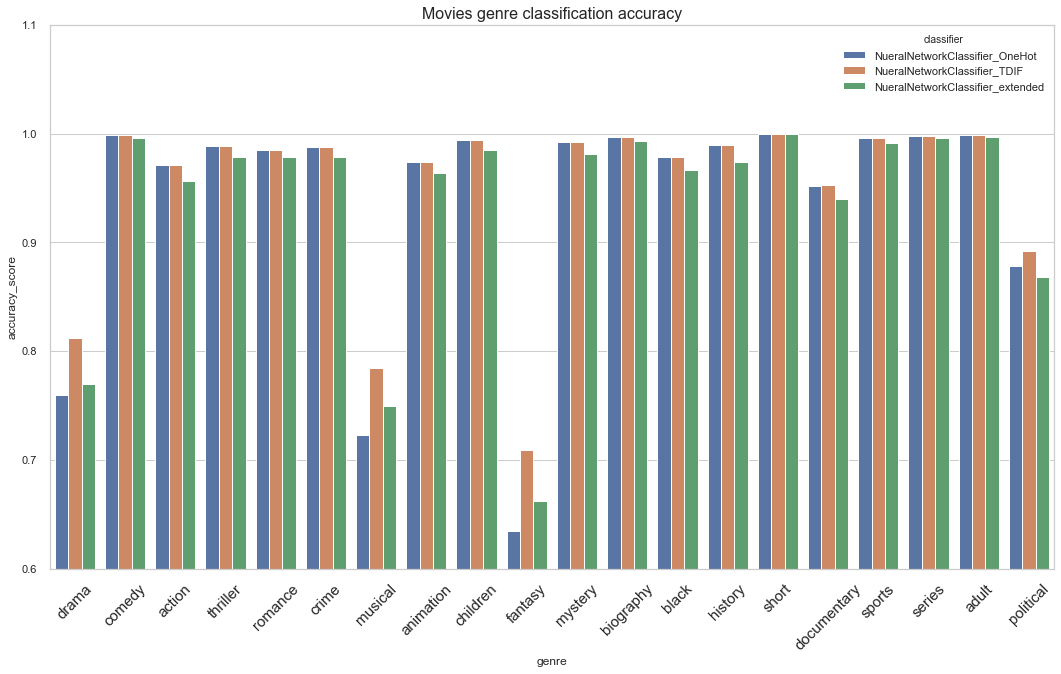

In [149]:
sns.set(rc={'figure.figsize':(18,10)})
sns.set(style="whitegrid")
plt.ylim(.6, 1.1)
s = sns.barplot(x="genre", y="accuracy_score", hue="classifier", data=comp) #.set_title('Movies genre classification accuracy (multinomialNB VS LinearSVC)')
s.set_title('Movies genre classification accuracy', size=16)
s.set_xticklabels(list(mainGenres) ,rotation=45, size=15)

In [150]:
comp = pd.concat([result_lsvc_df, result_mnb_df,result_lr_df, result_dtc_df, result_rfc_df, result_keras_one_hot_df, result_keras_tdif_df, result_keras_extend_df], ignore_index=True)
comp.sort_values('fscore').drop_duplicates(['genre'],keep='last')

,genre,accuracy_score,precision,recall,fscore,roc_auc,classifier
49,drama,0.718467,0.718467,0.718467,0.718467,0.729945,LogisticRegression
46,comedy,0.827225,0.827225,0.827225,0.827225,0.811100,LogisticRegression
40,action,0.861970,0.861970,0.861970,0.861970,0.850268,LogisticRegression
39,thriller,0.910995,0.910995,0.910995,0.910995,0.789052,MultinomialNB
95,romance,0.952642,0.952642,0.952642,0.952642,0.831564,RandomForestClassifier
107,crime,0.973584,0.973584,0.973584,0.973584,0.495944,NueralNetworkClassifier_OneHot
92,musical,0.978582,0.978582,0.978582,0.978582,0.744057,RandomForestClassifier
42,animation,0.980961,0.980961,0.980961,0.980961,0.832605,LogisticRegression
124,black,0.985245,0.985245,0.985245,0.985245,0.477731,NueralNetworkClassifier_TDIF
125,children,0.987863,0.987863,0.987863,0.987863,0.501205,NueralNetworkClassifier_TDIF


# Results

In [151]:
comp = pd.concat([result_lsvc_df, result_mnb_df,result_lr_df, result_dtc_df, result_rfc_df, result_keras_one_hot_df, result_keras_tdif_df, result_keras_extend_df], ignore_index=True)
comp.sort_values('fscore').drop_duplicates(['genre'],keep='last')

,genre,accuracy_score,precision,recall,fscore,roc_auc,classifier
49,drama,0.718467,0.718467,0.718467,0.718467,0.729945,LogisticRegression
46,comedy,0.827225,0.827225,0.827225,0.827225,0.811100,LogisticRegression
40,action,0.861970,0.861970,0.861970,0.861970,0.850268,LogisticRegression
39,thriller,0.910995,0.910995,0.910995,0.910995,0.789052,MultinomialNB
95,romance,0.952642,0.952642,0.952642,0.952642,0.831564,RandomForestClassifier
107,crime,0.973584,0.973584,0.973584,0.973584,0.495944,NueralNetworkClassifier_OneHot
92,musical,0.978582,0.978582,0.978582,0.978582,0.744057,RandomForestClassifier
42,animation,0.980961,0.980961,0.980961,0.980961,0.832605,LogisticRegression
124,black,0.985245,0.985245,0.985245,0.985245,0.477731,NueralNetworkClassifier_TDIF
125,children,0.987863,0.987863,0.987863,0.987863,0.501205,NueralNetworkClassifier_TDIF


[Text(0, 0, 'drama'),
 Text(0, 0, 'comedy'),
 Text(0, 0, 'action'),
 Text(0, 0, 'thriller'),
 Text(0, 0, 'romance'),
 Text(0, 0, 'crime'),
 Text(0, 0, 'musical'),
 Text(0, 0, 'animation'),
 Text(0, 0, 'children'),
 Text(0, 0, 'fantasy'),
 Text(0, 0, 'mystery'),
 Text(0, 0, 'biography'),
 Text(0, 0, 'black'),
 Text(0, 0, 'history'),
 Text(0, 0, 'short'),
 Text(0, 0, 'documentary'),
 Text(0, 0, 'sports'),
 Text(0, 0, 'series'),
 Text(0, 0, 'adult'),
 Text(0, 0, 'political')]

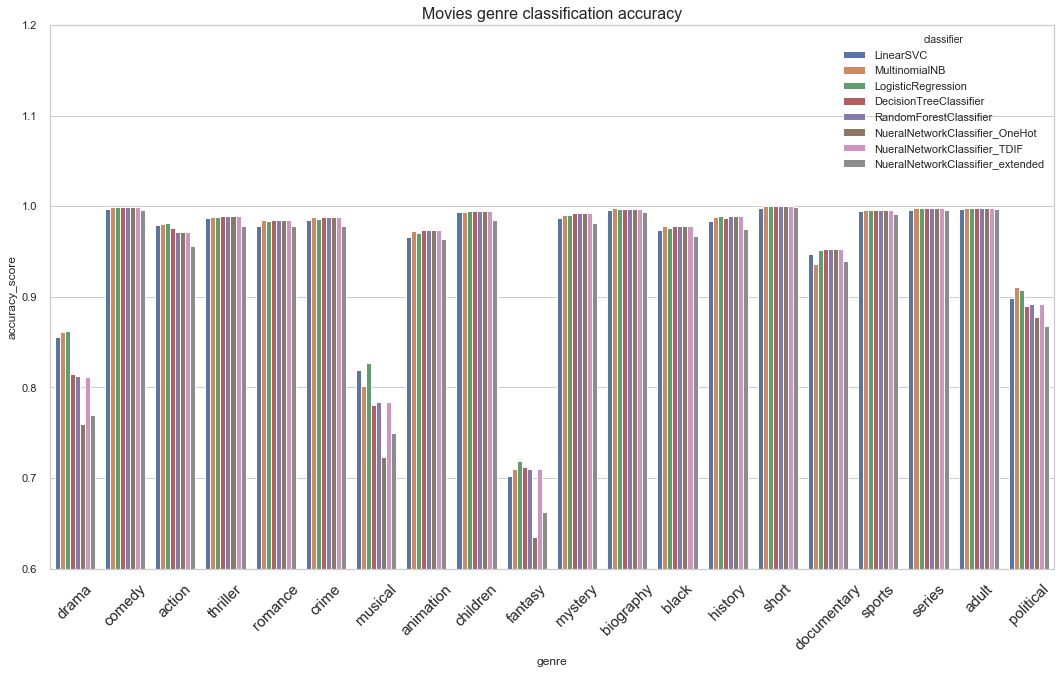

In [152]:
sns.set(rc={'figure.figsize':(18,10)})
sns.set(style="whitegrid")
plt.ylim(.6, 1.2)
s = sns.barplot(x="genre", y="accuracy_score", hue="classifier", data=comp) #.set_title('Movies genre classification accuracy (multinomialNB VS LinearSVC)')
s.set_title('Movies genre classification accuracy', size=16)
s.set_xticklabels(list(mainGenres) ,rotation=45, size=15)

In [154]:
comp.to_csv('classifier_result.csv')

## Conclusion

1. Conducted EDA on the Data
2. Learned and Applied NLP on the plot content
3. Tested out various classic and deep machine learning models
4. Built a pipeline for the best result and pickle the models
5. Developed a simple to use web application as an API for new classification

From the above we can see that LogisticRegression, MultinomialNB, RandomForestClassifier, NueralNetworkClassifier_OneHot and DecisionTreeClassifier were been able to have higher accuracies in many genre

Random Forest seems to have an over better results than most of the classifiers

<b>All the results of the model comparison are store into classifier_result.csv</b>